# **Datos de interés - Fuentes externas**

### **Librerías y modulos necesarios**

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

In [2]:
config = Settings()
config.vars.num.chi_squared_threshold = 0.0

### **Data DIVIPOLA**

Antes de comenzar es importante el cargue del siguiente conjunto de datos (DIVIPOLA), el cual será utilizado más adelante para la identificación de los municipios y departamentos.

In [13]:
column_types = {"Código Departamento": "object", "Código Municipio": "object", "Código Centro Poblado": "object", "Nombre Departamento": "object", "Nombre Municipio": "object",
    "Nombre Centro Poblado	": "object", "Tipo": "object"}
url = "https://raw.githubusercontent.com/sePerezAlbor/Data/refs/heads/main/Divipola.csv"
data_divipola = pd.read_csv(url, delimiter = ",", na_values = [" "], dtype = column_types)

### **Método Datos faltantes**

In [14]:
def analizar_columnas_faltantes(df):
    # Identificar columnas con valores faltantes
    df_missing_columns = df.loc[:, df.isnull().any()]
    
    if df_missing_columns.empty:
        print("No hay datos faltantes.")
        return None
    else:
        # Calcular el porcentaje de valores faltantes por columna
        missing_percent = df_missing_columns.isnull().mean() * 100
        
        # Ordenar los porcentajes de mayor a menor
        missing_percent_sorted = missing_percent.sort_values(ascending=False)
        
        # Graficar la distribución de datos faltantes con missingno
        msno.bar(df_missing_columns, color='#E77968', sort='ascending')
        
        # Personalizar el gráfico
        plt.title('Columnas con datos faltantes', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid(True)
        
        # Mostrar el gráfico
        plt.show()
        
        # Retornar el porcentaje de columnas con datos faltantes
        return missing_percent_sorted


En cada departamento ocurre un comportamiento y es que al observar los tamaños de la data de vivienda y georeferenciación notamos que contienen la misma cantidad de filas, es decir, de viviendas encuestadas. Mientras que en la de hogares y personas existen más datos debido a que en cada vivienda hay varios hogares y en cada hogar hay varias personas. Veamos cómo se puede relacionar.

## **Encuesta Nacional de Calidad de Vida**

Inicialmente, la encuesta nacional de calidad de vida cuenta con varios conjuntos de datos relacionados a diferentes ámbitos de la calidad de vida. En este caso, usaremos solamente cuatro, que son de interés para este trabajo.

In [636]:
df_servicios_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecv\\servicios_hogar_ecv_2023.CSV", sep=';')
df_salud_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecv\\salud_ecv_2023.CSV", sep=';')
df_internet_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecv\\internet_ecv_2023.CSV", sep=';')
df_vivienda_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecv\\vivienda_ecv_2023.CSV", sep=';')
df_hogar_2023 = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecv\\hogar_ecv_2023.CSV", sep=';')

Veamos el tamaño de estos datos:

In [637]:
dataframes = {
    'Vivienda': df_vivienda_2023,
    'Servicios': df_servicios_2023,
    'Salud': df_salud_2023,
    'Internet': df_internet_2023,
    'Hogar': df_hogar_2023
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (86063, 47)
Servicios: (86405, 96)
Salud: (240212, 153)
Internet: (223695, 86)
Hogar: (240212, 79)


Nótese que los tamaños de los dataframes son diferentes en todos los casos. Veamos a qué se debe esto.

In [638]:
for nombre, df in dataframes.items():
    print(f"\n Data de {nombre}:\n")
    display(df.head(5))  # si estás en Jupyter


 Data de Vivienda:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,...,P5661S5,P5661S6,P5661S7,P3157,P3157S1,P3157S2,P3157S3,P3157S4,FECHA_CARGA,P5660S3
0,7910114,1,1,1,73,1,3,282.370945,1,1,...,3,3,1,NaN,1,1,1,1,08-10-2023 10:11:20,2023
1,7910115,1,1,1,97,1,9,3.054217,1,1,...,1,3,2,NaN,1,2,2,1,08-10-2023 10:11:20,2023
2,7910119,1,1,1,66,440,3,31.288477,1,1,...,1,1,1,NaN,2,1,2,2,08-10-2023 10:11:20,2023
3,7910120,1,1,1,47,245,1,73.577749,1,1,...,1,1,4,NaN,2,2,2,2,08-10-2023 10:11:20,2023
4,7910121,1,1,1,18,1,3,48.549967,1,1,...,2,2,2,NaN,1,1,1,2,08-10-2023 10:11:20,2023



 Data de Servicios:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P5000,P5010,P791,P5018,P5018S1,...,P3174S1,P3174S2,P3174S3,P3174S4,P3174S5,I_HOGAR,I_UGASTO,PERCAPITA,I_OU,CANT_PERSONAS_HOGAR
0,7910114,1,1,1,282.370945,5,2,1,60000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,775000.0,775000.0,387500.0,0.0,2
1,7910115,1,1,1,3.054217,4,2,3,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,2200000.0,2200000.0,440000.0,0.0,5
2,7910119,1,1,1,31.288477,3,2,1,100000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,410000.0,410000.0,205000.0,0.0,2
3,7910120,1,1,1,73.577749,4,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,720000.0,720000.0,360000.0,0.0,2
4,7910121,1,1,1,48.549967,3,2,1,42000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1892500.0,1892500.0,946250.0,0.0,2



 Data de Salud:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P6090,P768,P6100,P6115,P5669,...,P3189S2A1,P8561,P3335,P3335S1,P3335S1A1,P8584,P5694,P5452,P6161,P1089
0,7910114,1,1,1,282.370945,1,NaN,3.0,NaN,NaN,...,NaN,NaN,1.0,3.0,17.0,2.0,NaN,NaN,NaN,NaN
1,7910114,2,1,2,282.370945,1,NaN,3.0,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7910115,1,1,1,3.054217,1,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7910115,2,1,2,3.054217,1,NaN,3.0,NaN,NaN,...,NaN,NaN,1.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,7910115,3,1,3,3.054217,1,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 Data de Internet:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P1910,P1911,P1912,P1084,P1710,...,P1080S4,P1080S5,P1080S6,P804,P805,P805S1,P805S2,P805S3,P805S4,P805S5
0,7910114,1,1,1,282.370945,5,5,5,1,NaN,...,1.0,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN
1,7910114,2,1,2,282.370945,2,5,5,1,NaN,...,1.0,NaN,NaN,1,NaN,1.0,NaN,1.0,NaN,NaN
2,7910115,1,1,1,3.054217,5,5,5,5,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN
3,7910115,2,1,2,3.054217,5,5,5,5,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,1.0,NaN,NaN
4,7910115,3,1,3,3.054217,5,2,5,2,NaN,...,NaN,NaN,NaN,2,NaN,1.0,NaN,NaN,NaN,NaN



 Data de Hogar:



,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,FEX_C,P6016,P1894,P6020,P6034,P6040,...,P1898,P1899,P3175,P1901,P1903,P1904,P1905,P1927,P3038,P3039
0,7910114,1,1,1,282.370945,1,3,2,1,43,...,6.0,7.0,6.0,8.0,6.0,3.0,10.0,7.0,1.0,2.0
1,7910114,2,1,2,282.370945,2,2,2,1,16,...,7.0,6.0,6.0,8.0,0.0,0.0,10.0,8.0,NaN,NaN
2,7910115,1,1,1,3.054217,1,3,1,1,54,...,2.0,8.0,6.0,7.0,5.0,1.0,8.0,6.0,2.0,1.0
3,7910115,2,1,2,3.054217,2,3,2,1,50,...,7.0,8.0,9.0,8.0,5.0,3.0,8.0,8.0,1.0,2.0
4,7910115,3,1,3,3.054217,3,3,1,1,24,...,7.0,7.0,7.0,8.0,7.0,7.0,4.0,7.0,2.0,1.0


Podemos ver que en todos los dataframe existen las columnas de `DIRECTORIO`, `SECUENCIA_ENCUESTA`, `SECUENCIA_P`, `ORDEN`. Estas columnas corresponden a los identificadores únicos de cada tabla. Ahora bien, en los dataframes de salud e internet, tienen más observaciones y esto se debe a que, en las datas de vivienda y servicios solo fueron encuestados una persona por vivienda, mientras que en las de salud e internet se encuestaron a cada persona de cada hogar de cada vivienda.

- `DIRECTORIO`: Representa código único de una vivienda.
- `SECUENCIA_ENCUESTA`: Representa el conteo de cada hogar dentro de una vivienda.
- `SECUENCIA_P`: Representa una persona dentro de cada hogar de una vivienda.
- `ORDEN`: Representa el orden de una persona encuestada dentro de una vivienda.


Dado que la base de datos de viviendas contiene `86.063` registros, podemos identificar las viviendas únicas encuestadas. Como nuestro interés se centra en analizar cómo las condiciones sociodemográficas influyen en la salud de las personas dentro de su entorno, en este caso decidimos conservar únicamente un registro por vivienda: la primera persona encuestada del primer hogar. Esta decisión nos permitirá, más adelante, realizar una concatenación adecuada entre los distintos *DataFrames*, evitando tanto la duplicación de datos como la pérdida de información.


In [639]:
df_servicios_2023 = df_servicios_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_vivienda_2023 = df_vivienda_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_salud_2023 = df_salud_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_internet_2023 = df_internet_2023.drop_duplicates(subset='DIRECTORIO', keep='first')
df_hogar_2023 = df_hogar_2023.drop_duplicates(subset='DIRECTORIO', keep='first')

In [640]:
dataframes = {
    'Vivienda': df_vivienda_2023,
    'Servicios': df_servicios_2023,
    'Salud': df_salud_2023,
    'Internet': df_internet_2023,
    'Hogar': df_hogar_2023
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")

Vivienda: (86063, 47)
Servicios: (86063, 96)
Salud: (86063, 153)
Internet: (86063, 86)
Hogar: (86063, 79)


Ahora los conjuntos de datos cuentan con la misma cantidad de observaciones/registros.

### **Filtración por columnas de interés**

Al observar el tamaño de cada conjunto de datos, vemos que hay presencia de diferentes tipos de columnas y variables. Luego de una respectiva investigación, filtraremos estos conjuntos con el fin de obtener solo las columnas de nuestro interés. Más adelante se explicará el significado de cada variable.

In [641]:
columnas_vivienda = [
    'DIRECTORIO', 'FEX_C', 'P1_DEPARTAMENTO', 'P1_MUNICIPIO', 'REGION', 'P5661',
    'P5661S1', 'P5661S2', 'P5661S3', 'P5661S4', 'P5661S9',
    'P5661S5', 'P5661S6', 'P5661S7',
    'P4065', 'P4065S1', 'P4065S2', 'P4065S3', 'P4065S4', 'P4065S5'
]

df_vivienda = df_vivienda_2023[columnas_vivienda]


In [642]:
columnas_servicios = ['DIRECTORIO', 'I_HOGAR']
df_servicios = df_servicios_2023[columnas_servicios]

In [643]:
columnas_internet = ['DIRECTORIO', 'P1084']
df_internet = df_internet_2023[columnas_internet]


In [644]:
columnas_salud = [
    'DIRECTORIO',
    'P8551', 'P3511', 'P6115', 'P6100',
    'P799', 'P799S2', 'P799S3', 'P799S1', 'P799S4', 'P799S5'
]

df_salud = df_salud_2023[columnas_salud]


In [645]:
columnas_hogar = [
    'DIRECTORIO',
    'P1927'
]
df_hogar = df_hogar_2023[columnas_hogar]

Ahora, realizamos el merge de los conjuntos de datos.

In [646]:
df_ecv = pd.merge(df_vivienda, df_servicios, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_salud, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_internet, on='DIRECTORIO', how='left')
df_ecv = pd.merge(df_ecv, df_hogar, on='DIRECTORIO', how='left')

In [647]:
df_ecv.head()

,DIRECTORIO,FEX_C,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,P5661,P5661S1,P5661S2,P5661S3,P5661S4,...,P6115,P6100,P799,P799S2,P799S3,P799S1,P799S4,P799S5,P1084,P1927
0,7910114,282.370945,73,1,3,NaN,2,1,1,3,...,NaN,3.0,NaN,2,2,2,2,2,1,7.0
1,7910115,3.054217,97,1,9,NaN,3,2,3,4,...,4.0,1.0,NaN,2,2,2,2,2,5,6.0
2,7910119,31.288477,66,440,3,NaN,1,1,1,1,...,NaN,3.0,NaN,2,2,2,2,2,1,9.0
3,7910120,73.577749,47,245,1,NaN,1,1,1,2,...,NaN,3.0,NaN,2,2,2,2,2,1,8.0
4,7910121,48.549967,18,1,3,NaN,2,2,2,2,...,1.0,1.0,NaN,2,2,2,2,2,1,5.0


### **Departamentos y municipios**

Cada observación del conjunto de datos corresponde a una persona encuestada. La información disponible sobre su ubicación se encuentra a nivel de municipio, departamento y, por consiguiente, región. Actualmente, el dataset contiene los códigos DIVIPOLA para representar estas ubicaciones. Por lo tanto, se realizará la conversión de estos códigos a sus respectivos nombres, lo cual facilitará la identificación y el análisis posterior de características geográficas y sociodemográficas relevantes.


In [648]:
# Convertir a string y rellenar con ceros a la izquierda
df_ecv["P1_DEPARTAMENTO"] = df_ecv["P1_DEPARTAMENTO"].astype(str).str.zfill(2)
df_ecv["P1_MUNICIPIO"] = df_ecv["P1_MUNICIPIO"].astype(str).str.zfill(3)
df_ecv['MUNICIPIO'] = df_ecv['P1_DEPARTAMENTO'] + df_ecv['P1_MUNICIPIO']
df_ecv['REGION'] = df_ecv['REGION'].astype(str).str.zfill(2)

In [649]:
condiciones = [
    df_ecv['P1_DEPARTAMENTO'].isin(['91', '18', '94', '95', '86', '97']),
    df_ecv['P1_DEPARTAMENTO'].isin(['5', '11', '15', '17', '25', '41', '54', '63', '66', '68', '73']),
    df_ecv['P1_DEPARTAMENTO'].isin(['08', '13', '20', '23', '44', '47', '70', '88']),
    df_ecv['P1_DEPARTAMENTO'].isin(['81', '85', '50', '99']),
    df_ecv['P1_DEPARTAMENTO'].isin(['19', '27', '52', '76'])
]

regiones = ['AMAZONIA', 'ANDINA', 'CARIBE', 'ORINOQUIA', 'PACIFICA']

df_ecv['REGION'] = np.select(condiciones, regiones, default='Otra')

In [650]:
departamento_dict = dict(zip(data_divipola['Código Departamento'], data_divipola['Nombre Departamento']))
municipio_dict = dict(zip(data_divipola['Código Municipio'], data_divipola['Nombre Municipio']))
df_ecv['DEPARTAMENTO'] = df_ecv['P1_DEPARTAMENTO'].map(departamento_dict)
df_ecv['MUNICIPIO'] = df_ecv['MUNICIPIO'].map(municipio_dict)
df_ecv.drop(columns=['P5661', 'P4065', 'P799','P799S4', 'P799S5'], inplace=True)

In [651]:
df_ecv

,DIRECTORIO,FEX_C,P1_DEPARTAMENTO,P1_MUNICIPIO,REGION,P5661S1,P5661S2,P5661S3,P5661S4,P5661S9,...,P3511,P6115,P6100,P799S2,P799S3,P799S1,P1084,P1927,MUNICIPIO,DEPARTAMENTO
0,7910114,282.370945,73,001,ANDINA,2,1,1,3,1,...,1.0,NaN,3.0,2,2,2,1,7.0,IBAGUÉ,TOLIMA
1,7910115,3.054217,97,001,AMAZONIA,3,2,3,4,3,...,1.0,4.0,1.0,2,2,2,5,6.0,MITÚ,VAUPÉS
2,7910119,31.288477,66,440,ANDINA,1,1,1,1,1,...,1.0,NaN,3.0,2,2,2,1,9.0,MARSELLA,RISARALDA
3,7910120,73.577749,47,245,CARIBE,1,1,1,2,1,...,1.0,NaN,3.0,2,2,2,1,8.0,EL BANCO,MAGDALENA
4,7910121,48.549967,18,001,AMAZONIA,2,2,2,2,2,...,1.0,1.0,1.0,2,2,2,1,5.0,FLORENCIA,CAQUETÁ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86058,8201918,108.536187,66,045,ANDINA,1,1,1,1,1,...,1.0,NaN,3.0,2,2,2,2,8.0,APÍA,RISARALDA
86059,8201924,5.838985,91,001,AMAZONIA,1,1,2,1,2,...,1.0,NaN,3.0,2,2,2,5,5.0,LETICIA,AMAZONAS
86060,8201925,72.996879,66,001,ANDINA,1,1,1,1,1,...,1.0,4.0,1.0,2,2,2,1,8.0,PEREIRA,RISARALDA
86061,8201926,30.973489,66,001,ANDINA,1,1,1,1,1,...,1.0,4.0,1.0,2,2,2,5,8.0,PEREIRA,RISARALDA


### **Organización del conjunto de datos**

#### **Renombrado de variables**

In [652]:
df_ecv = df_ecv.rename(columns={
    'DIRECTORIO': 'ID',
    'FEX_C': 'FEX_C',
    'P1_DEPARTAMENTO': 'COD_DPTO',
    'P1_MUNICIPIO': 'COD_MUNI',
    'REGION': 'REGION',
    'P5661S1': 'RUIDOS',
    'P5661S2': 'MALOS_OLORES',
    'P5661S3': 'PRESENCIA_BASURAS',
    'P5661S4': 'CONTAMINACION_AIRE',
    'P5661S5': 'INVASION_ESPACIO_PUBLICO',
    'P5661S6': 'MOLESTIAS_ANIMALES',
    'P5661S7': 'PRESENCIA_INSECTOS',
    'P5661S9': 'CONTAMINACION_AGUA',
    'P4065S1': 'INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS',
    'P4065S2': 'AVALANCHAS_DERRUMBES_DESLIZAMIENTOS',
    'P4065S3': 'HUNDIMIENTO_DE_TERRENO',
    'P4065S4': 'VENTARRONES_TORMENTAS_VENDAVALES',
    'P4065S5': 'SISMO_TEMBLOR',
    'I_HOGAR': 'INGRESO_MENSUAL_TOTAL',
    'P8551': 'PAGO_SEG_SOCIAL',
    'P3511': 'UBICACION_ENTIDAD_SALUD',
    'P6115': 'RESPONSABLE_PAGO_AFILIACION',
    'P6100': 'SEG_SOCIAL',
    'P799S1': 'POLIZA_HOSPITALIZACION_CIRUGIA',
    'P799S2': 'MEDICINA_PREPAGADA',
    'P799S3': 'PLAN_COMPLEMENTARIO_EPS',
    'P1084': 'FRECUENCIA_INTERNET',
    'P1927': 'PERCEPCION_CALIDAD_DE_VIDA'
})


In [653]:
# Lista con el orden deseado de las columnas
orden_deseado = [
    'ID', 'FEX_C', 'COD_DPTO', 'COD_MUNI', 'REGION', 'MUNICIPIO', 'DEPARTAMENTO',
    'RUIDOS', 'MALOS_OLORES', 'PRESENCIA_BASURAS', 'CONTAMINACION_AIRE',
    'CONTAMINACION_AGUA', 'INVASION_ESPACIO_PUBLICO', 'MOLESTIAS_ANIMALES',
    'PRESENCIA_INSECTOS', 'INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS',
    'AVALANCHAS_DERRUMBES_DESLIZAMIENTOS', 'HUNDIMIENTO_DE_TERRENO',
    'VENTARRONES_TORMENTAS_VENDAVALES', 'SISMO_TEMBLOR',
    'INGRESO_MENSUAL_TOTAL', 'PAGO_SEG_SOCIAL', 'UBICACION_ENTIDAD_SALUD',
    'RESPONSABLE_PAGO_AFILIACION', 'SEG_SOCIAL', 'MEDICINA_PREPAGADA',
    'PLAN_COMPLEMENTARIO_EPS', 'POLIZA_HOSPITALIZACION_CIRUGIA',
    'FRECUENCIA_INTERNET', 'PERCEPCION_CALIDAD_DE_VIDA'
]

# Reordenar las columnas
df_ecv = df_ecv[orden_deseado]

#### **Renombrado de categorías**

In [654]:
mapa_frecuencia = {
    1: 'Todos los días',
    2: 'Semanalmente',
    3: 'Mensualmente',
    4: 'Anualmente',
    5: 'No usa internet'
}

# Crear una nueva columna con las categorías renombradas
df_ecv['FRECUENCIA_INTERNET'] = df_ecv['FRECUENCIA_INTERNET'].map(mapa_frecuencia)


In [655]:
# Mapeo de la variable SEG_SOCIAL
mapeo_seg_social = {
    1: 'Contributivo (EPS)',
    2: 'Especial (fuerzas armadas, ecopetrol, universidades públicas, magisterio)',
    3: 'Subsidiado (EPS-S)',
    9: 'No sabe, no informa'
}

# Aplicando el mapeo a la columna SEG_SOCIAL de tu DataFrame
df_ecv['SEG_SOCIAL'] = df_ecv['SEG_SOCIAL'].map(mapeo_seg_social)


In [656]:
map_binario = {
    1:'SI',
    2:'NO'
}
df_ecv['INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS'] = df_ecv['INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS'].map(map_binario)
df_ecv['AVALANCHAS_DERRUMBES_DESLIZAMIENTOS'] = df_ecv['AVALANCHAS_DERRUMBES_DESLIZAMIENTOS'].map(map_binario)
df_ecv['HUNDIMIENTO_DE_TERRENO'] = df_ecv['HUNDIMIENTO_DE_TERRENO'].map(map_binario)
df_ecv['VENTARRONES_TORMENTAS_VENDAVALES'] = df_ecv['VENTARRONES_TORMENTAS_VENDAVALES'].map(map_binario)
df_ecv['SISMO_TEMBLOR'] = df_ecv['SISMO_TEMBLOR'].map(map_binario)
df_ecv['MEDICINA_PREPAGADA'] = df_ecv['MEDICINA_PREPAGADA'].map(map_binario)
df_ecv['PLAN_COMPLEMENTARIO_EPS'] = df_ecv['PLAN_COMPLEMENTARIO_EPS'].map(map_binario)
df_ecv['POLIZA_HOSPITALIZACION_CIRUGIA'] = df_ecv['POLIZA_HOSPITALIZACION_CIRUGIA'].map(map_binario)

In [657]:
mapa_pago_afiliacion = {
    1: 'Parte propia y parte empresa',
    2: 'Descuento por pensión',
    3: 'Pago total propio',
    4: 'Pago total empresa',
    5: 'No paga (beneficiario)'
}

df_ecv['RESPONSABLE_PAGO_AFILIACION'] = df_ecv['RESPONSABLE_PAGO_AFILIACION'].map(mapa_pago_afiliacion)


In [658]:
map_municipio = {
    1:'MISMO MUNICIPIO',
    2:'OTRO MUNICIPIO'
}

df_ecv['UBICACION_ENTIDAD_SALUD'] = df_ecv['UBICACION_ENTIDAD_SALUD'].map(map_municipio)

In [659]:
map_ambiente = {
    1:'NUNCA',
    2:'ALGUNAS VECES',
    3: 'MUCHAS VECES',
    4: 'SIEMPRE'
}

df_ecv['RUIDOS'] = df_ecv['RUIDOS'].map(map_ambiente)
df_ecv['MALOS_OLORES'] = df_ecv['MALOS_OLORES'].map(map_ambiente)
df_ecv['PRESENCIA_BASURAS'] = df_ecv['PRESENCIA_BASURAS'].map(map_ambiente)
df_ecv['CONTAMINACION_AIRE'] = df_ecv['CONTAMINACION_AIRE'].map(map_ambiente)
df_ecv['CONTAMINACION_AGUA'] = df_ecv['CONTAMINACION_AGUA'].map(map_ambiente)
df_ecv['INVASION_ESPACIO_PUBLICO'] = df_ecv['INVASION_ESPACIO_PUBLICO'].map(map_ambiente)
df_ecv['MOLESTIAS_ANIMALES'] = df_ecv['MOLESTIAS_ANIMALES'].map(map_ambiente)
df_ecv['PRESENCIA_INSECTOS'] = df_ecv['PRESENCIA_INSECTOS'].map(map_ambiente)



In [660]:
df_ecv = df_ecv[df_ecv['REGION'] == 'CARIBE']

In [661]:
df_ecv.head()

,ID,FEX_C,COD_DPTO,COD_MUNI,REGION,MUNICIPIO,DEPARTAMENTO,RUIDOS,MALOS_OLORES,PRESENCIA_BASURAS,...,INGRESO_MENSUAL_TOTAL,PAGO_SEG_SOCIAL,UBICACION_ENTIDAD_SALUD,RESPONSABLE_PAGO_AFILIACION,SEG_SOCIAL,MEDICINA_PREPAGADA,PLAN_COMPLEMENTARIO_EPS,POLIZA_HOSPITALIZACION_CIRUGIA,FRECUENCIA_INTERNET,PERCEPCION_CALIDAD_DE_VIDA
3,7910120,73.577749,47,245,CARIBE,EL BANCO,MAGDALENA,NUNCA,NUNCA,NUNCA,...,7.200000e+05,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,Todos los días,8.0
63,7910186,221.608387,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,NUNCA,NUNCA,NUNCA,...,1.400000e+06,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,No usa internet,8.0
64,7910187,143.166971,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,NUNCA,ALGUNAS VECES,ALGUNAS VECES,...,9.000000e+05,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,Todos los días,6.0
140,7910280,549.758837,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,MUCHAS VECES,ALGUNAS VECES,NUNCA,...,4.131433e+06,145000.0,MISMO MUNICIPIO,Parte propia y parte empresa,"Especial (fuerzas armadas, ecopetrol, universi...",NO,NO,NO,Todos los días,8.0
143,7910283,98.321580,13,001,CARIBE,CARTAGENA DE INDIAS,BOLÍVAR,ALGUNAS VECES,ALGUNAS VECES,ALGUNAS VECES,...,1.004167e+06,NaN,MISMO MUNICIPIO,NaN,Subsidiado (EPS-S),NO,NO,NO,No usa internet,5.0


In [662]:
df_ecv.shape

(19442, 30)

#### **Diccionario de variables**

| Variable                                       | Descripción                                                    | Categorías / Tipo                                |
|-----------------------------------------------|----------------------------------------------------------------|--------------------------------------------------|
| `ID`                                           | Identificador único de la vivienda donde se realizó la encuesta | `Numérico`                                       |
| `FEX_C`                                        | Factor de expansión muestral                                   | `Numérico`                                       |
| `COD_DPTO`                                     | Código del departamento según DANE                             | `Numérico`                                       |
| `COD_MUNI`                                     | Código del municipio según DANE                                | `Numérico`                                       |
| `REGION`                                       | Región geográfica del país                                     | - `CARIBE`<br> - `ANDINA`<br> - `PACIFICA`<br> - `ORINOQUIA`<br> - `AMAZONIA` <br> **En este caso solo se tendrá en cuenta la región Caribe** |
| `MUNICIPIO`                                    | Nombre del municipio                                           | `Texto`                                          |
| `DEPARTAMENTO`                                 | Nombre del departamento                                        | `Texto`                                          |
| `RUIDOS`                                       | ¿Con qué frecuencia se presentan ruidos externos?              | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `MALOS_OLORES`                                 | ¿Con qué frecuencia se presentan malos olores externos?        | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `PRESENCIA_BASURAS`                            | ¿Con qué frecuencia se observan basuras en el entorno?         | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `CONTAMINACION_AIRE`                           | ¿Con qué frecuencia se percibe contaminación del aire?         | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `CONTAMINACION_AGUA`                           | ¿Contaminación en cuerpos de agua cercanos?                    | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `INVASION_ESPACIO_PUBLICO`                     | ¿Se ha presentado ocupación indebida del espacio público?      | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `MOLESTIAS_ANIMALES`                           | ¿Presencia de animales que generan molestias?                  | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `PRESENCIA_INSECTOS`                           | ¿Presencia de insectos o plagas?                               | - `NUNCA`<br> - `ALGUNAS VECES`<br> - `MUCHAS VECES`<br> - `SIEMPRE` |
| `INUNDACIONES_DESBORDAMIENTO_CRECIENTES_ARROYOS` | ¿La vivienda ha sido afectada por inundaciones?             | - `SI`<br> - `NO`                                  |
| `AVALANCHAS_DERRUMBES_DESLIZAMIENTOS`          | ¿Ha sido afectada por derrumbes o deslizamientos?              | - `SI`<br> - `NO`                                  |
| `HUNDIMIENTO_DE_TERRENO`                       | ¿Hundimiento o agrietamiento del terreno?                      | - `SI`<br> - `NO`                                  |
| `VENTARRONES_TORMENTAS_VENDAVALES`             | ¿Fenómenos climáticos fuertes como vendavales?                 | - `SI`<br> - `NO`                                  |
| `SISMO_TEMBLOR`                                 | ¿Ha sido afectada por sismos o temblores?                      | - `SI`<br> - `NO`                                  |
| `INGRESO_MENSUAL_TOTAL`                        | Ingreso mensual total del hogar                                | `Numérico`                                       |
| `PAGO_SEG_SOCIAL`                              | Valor del pago mensual en salud                                | `Numérico`                                       |
| `UBICACION_ENTIDAD_SALUD`                      | Ubicación de la entidad de salud                               | - `MISMO MUNICIPIO`<br> - `DIFERENTE MUNICIPIO`     |
| `RESPONSABLE_PAGO_AFILIACION`                  | Quién paga la afiliación mensual a salud                       | - `Parte propia y parte empresa`<br> - `Descuento por pensión`<br> - `Pago total propio`<br> - `Pago total empresa`<br> - `No paga (beneficiario)` |
| `SEG_SOCIAL`                                    | Tipo de afiliación al sistema de salud                         | - `Contributivo (EPS)`<br> - `Especial (Fuerzas armadas, Ecopetrol, universidades públicas, magisterio)`<br> - `Subsidiado (EPS-S)`<br> - `No sabe, no informa` |
| `MEDICINA_PREPAGADA`                           | ¿Tiene medicina prepagada?                                     | - `SI`<br> - `NO`                                  |
| `PLAN_COMPLEMENTARIO_EPS`                      | ¿Tiene plan complementario de EPS?                             | - `SI`<br> - `NO`                                  |
| `POLIZA_HOSPITALIZACION_CIRUGIA`               | ¿Cuenta con póliza para hospitalización o cirugía?             | - `SI`<br> - `NO`                                  |
| `FRECUENCIA_INTERNET`                          | Frecuencia de acceso a internet                                | - `Todos los días`<br> - `Semanalmente`<br> - `Mensualmente`<br> - `Anualmente`<br> - `No usa internet` |
| `PERCEPCION_CALIDAD_DE_VIDA`                   | Percepción sobre la calidad de vida                            | `10: Mejor vida - 0: Peor vida`                  |



**NOTA:**

El factor de expansión es un valor utilizado en estadísticas para ajustar una muestra de forma que represente adecuadamente a una población más grande, compensando las diferencias en la selección de la muestra.
*Ejemplo: Si un factor de expansión es 3, significa que cada observación en la muestra debe ser multiplicada por 3 para estimar el valor correspondiente en la población completa.*

### **Datos faltantes**

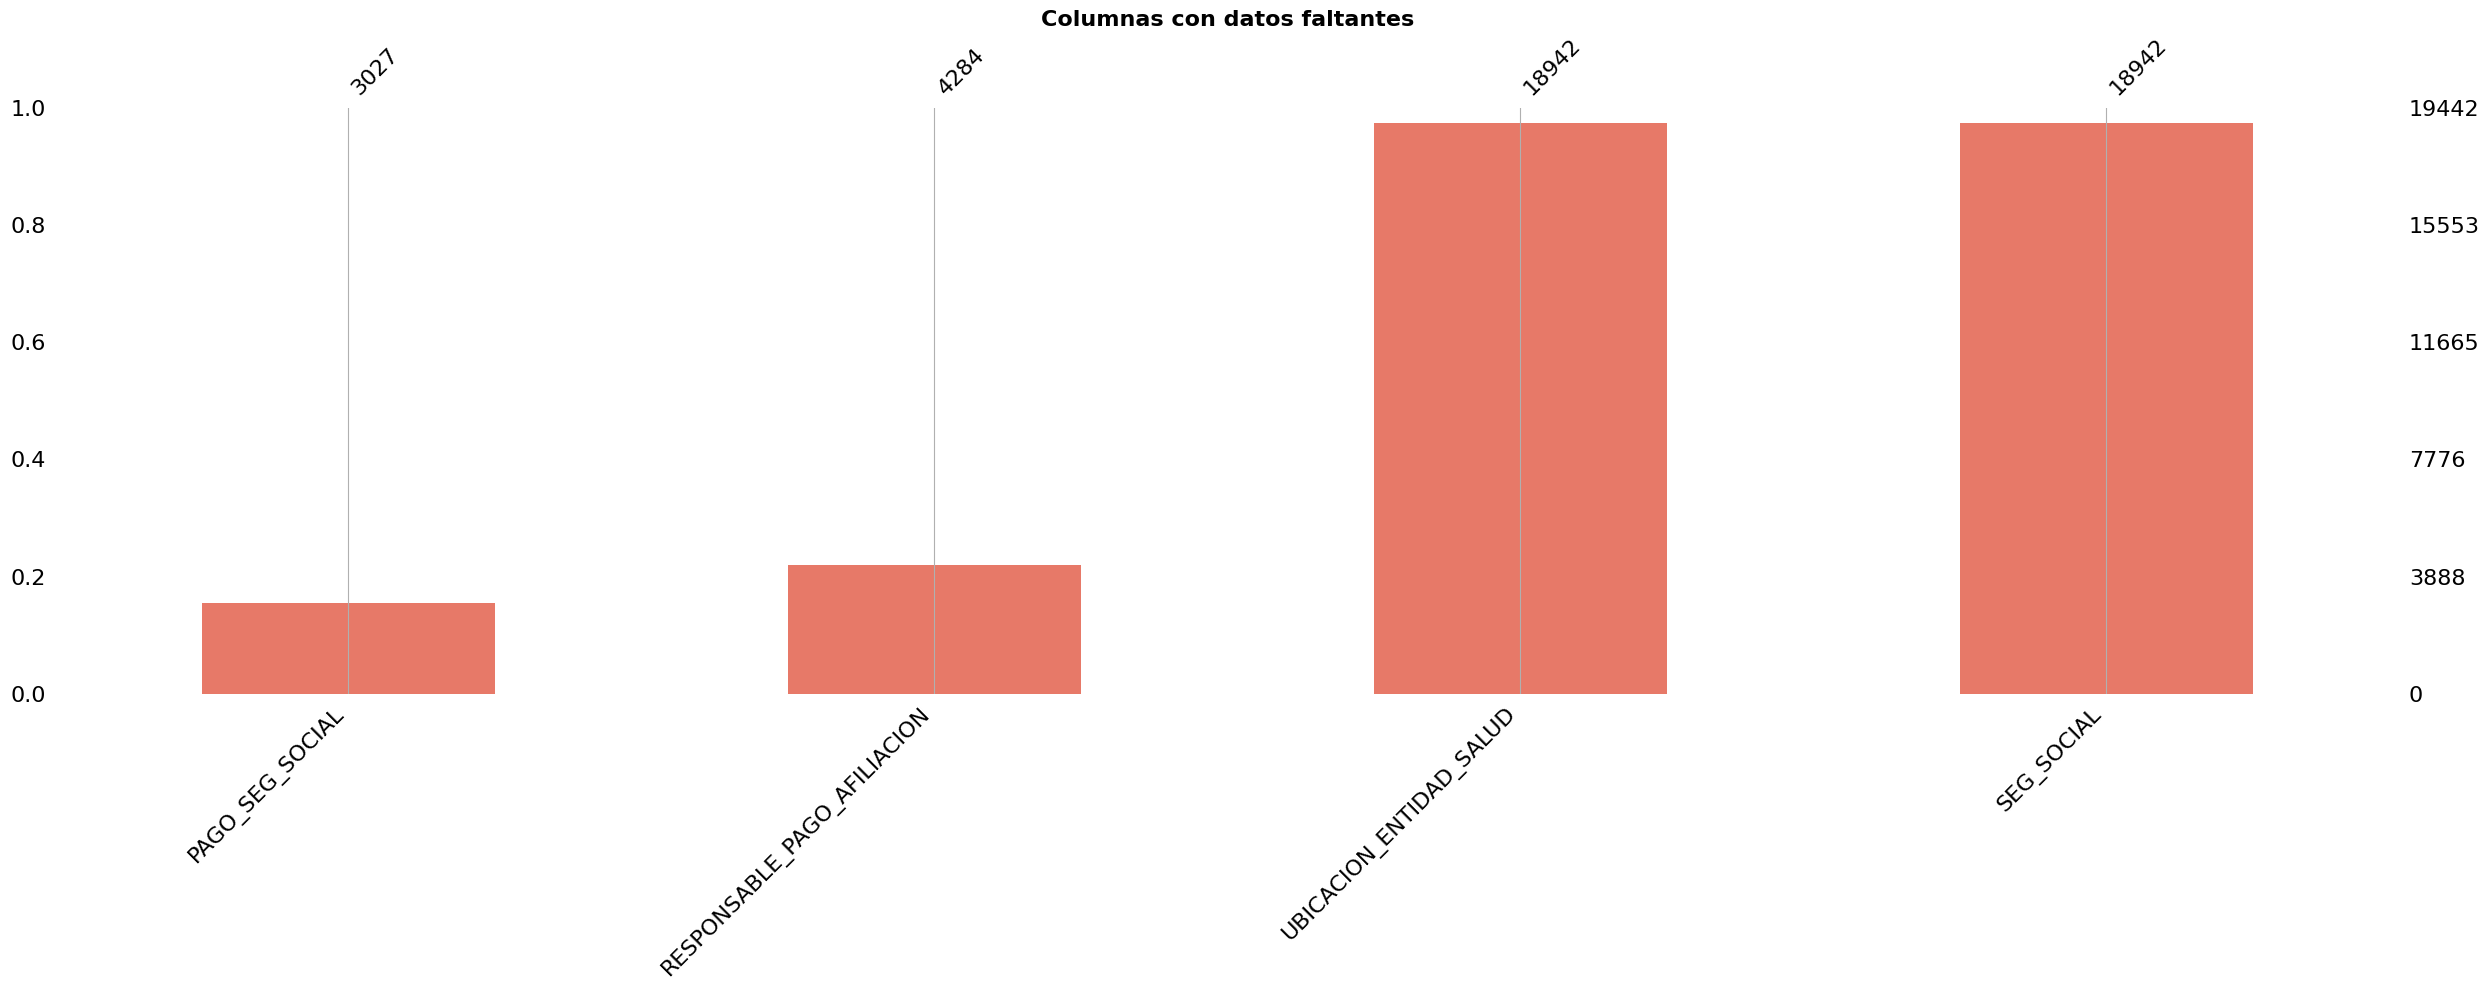

PAGO_SEG_SOCIAL                84.430614
RESPONSABLE_PAGO_AFILIACION    77.965230
UBICACION_ENTIDAD_SALUD         2.571752
SEG_SOCIAL                      2.571752
dtype: float64

In [663]:
analizar_columnas_faltantes(df_ecv)

Dado que las variables `PAGO_SEG_SOCIAL` y `RESPONSABLE_PAGO_AFILIACION` representan un alto % de valores faltantes, no se tendrán en cuenta para el estudio. (VER BIEN ESTA PARTE)

### **Casos por departamento y municipio**

In [664]:
casos_por_municipio = df_ecv.groupby('MUNICIPIO').size().reset_index(name='CASOS')
casos_por_municipio


,MUNICIPIO,CASOS
0,ACHÍ,65
1,AGUACHICA,204
2,AGUSTÍN CODAZZI,135
3,ALBANIA,104
4,ALTOS DEL ROSARIO,60
...,...,...
141,URUMITA,46
142,VALENCIA,102
143,VALLEDUPAR,720
144,VILLANUEVA,103


In [665]:
casos_por_departamento = df_ecv.groupby('DEPARTAMENTO').size().reset_index(name='CASOS')
casos_por_departamento

,DEPARTAMENTO,CASOS
0,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,876
1,ATLÁNTICO,2730
2,BOLÍVAR,3068
3,CESAR,2508
4,CÓRDOBA,2581
5,LA GUAJIRA,2857
6,MAGDALENA,2186
7,SUCRE,2636


### **EDA**

In [666]:
profile = ProfileReport(df_ecv, title="Reporte general", config=config)
profile.to_file("reporte.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 875.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **Unidad para las victimas (Datos para la paz)**

Esta data esta relacionada a nivel municipal, es del año 2023 y representa el Riesgo de victimización en cada municipio mediante los clusters.

In [667]:
df_violencia = pd.read_excel("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_violencia.xlsx")

In [668]:
df_violencia.head()

,Código Departamento,Departamento,Código DT,Dirección Territorial,Código PDET,PDET,Código Municipio,Municipio,Estimado,Cluster
0,5,Antioquia,10,DT Antioquia,NaN,No PDET,5001,Medellín,0.183561,Medio Bajo
1,5,Antioquia,10,DT Antioquia,NaN,No PDET,5002,Abejorral,0.196294,Medio Bajo
2,5,Antioquia,10,DT Antioquia,NaN,No PDET,5004,Abriaquí,0.099665,Bajo
3,5,Antioquia,10,DT Antioquia,NaN,No PDET,5021,Alejandría,0.108635,Bajo
4,5,Antioquia,10,DT Antioquia,NaN,No PDET,5030,Amagá,0.129257,Medio Bajo


In [669]:
columnas_interes = ['Departamento', 'Municipio', 'Estimado', 'Cluster' ]
df_violencia = df_violencia[columnas_interes]
renombre_columnas = {
    'Departamento': 'DEPARTAMENTO',
    'Municipio': 'MUNICIPIO',
    'Estimado': 'CASOS',
    'Cluster': 'CLUSTER'
}

df_violencia['Departamento'] = df_violencia['Departamento'].str.upper()
df_violencia['Municipio'] = df_violencia['Municipio'].str.upper()

df_violencia = df_violencia.rename(columns=renombre_columnas)
df_violencia.head()

,DEPARTAMENTO,MUNICIPIO,CASOS,CLUSTER
0,ANTIOQUIA,MEDELLÍN,0.183561,Medio Bajo
1,ANTIOQUIA,ABEJORRAL,0.196294,Medio Bajo
2,ANTIOQUIA,ABRIAQUÍ,0.099665,Bajo
3,ANTIOQUIA,ALEJANDRÍA,0.108635,Bajo
4,ANTIOQUIA,AMAGÁ,0.129257,Medio Bajo


In [670]:
departamentos_caribe = [
    'ATLÁNTICO', 'BOLÍVAR', 'CESAR', 'CÓRDOBA', 'LA GUAJIRA',
    'MAGDALENA', 'SUCRE', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'
]

# Filtrar el DataFrame
df_violencia = df_violencia[df_violencia['DEPARTAMENTO'].isin(departamentos_caribe)]

# Verificar resultados
df_violencia.head()

,DEPARTAMENTO,MUNICIPIO,CASOS,CLUSTER
125,ATLÁNTICO,BARRANQUILLA,0.118209,Bajo
126,ATLÁNTICO,BARANOA,0.087091,Bajo
127,ATLÁNTICO,CAMPO DE LA CRUZ,0.083355,Bajo
128,ATLÁNTICO,CANDELARIA,0.109280,Bajo
129,ATLÁNTICO,GALAPA,0.116874,Bajo


In [671]:
df_violencia.shape

(197, 4)

In [672]:
df_violencia['CLUSTER'].value_counts()

CLUSTER
Medio Bajo    82
Bajo          65
Medio         36
Medio Alto    11
Alto           3
Name: count, dtype: int64

### **Diccionario de variables**

| Variable       | Descripción                                                                 | Categorías / Tipo                                                                 |
|----------------|------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| `DEPARTAMENTO` | Nombre del departamento.                                                     | `Texto`                                                                            |
| `MUNICIPIO`    | Nombre del municipio.                                                        | `Texto`                                                                            |
| `ESTIMADO`     | Valor numérico estimado del riesgo de victimización.                        | `Numérico`                                                                         |
| `CLUSTER`      | Agrupación del municipio según el nivel de riesgo.                          | - `BAJO`<br>- `MEDIO BAJO`<br>- `MEDIO`<br>- `MEDIO ALTO`<br>- `ALTO`             |


### **Datos faltantes**

In [673]:
analizar_columnas_faltantes(df_violencia)

No hay datos faltantes.


## **Censo Nacional de Población y Vivienda**

Inicialmente procedemos a cargar los conjuntos de datos por cada departamento.

In [4]:
ruta_base = r"C:\Users\CCOSTA397\OneDrive\Desktop\CIDEACC\convocatoria38\raw_data\data_dane"

df_cargados = []

if not os.path.exists(ruta_base):
    print("Ruta no encontrada:", ruta_base)
else:
    print("Ruta encontrada:", ruta_base)

    departamentos = [d for d in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, d))]
    print("📂 Carpetas encontradas:", departamentos)

    for depto in departamentos:
        ruta_depto = os.path.join(ruta_base, depto)
        print(f"\n📁 Procesando carpeta: {depto}")

        for archivo in os.listdir(ruta_depto):
            if archivo.endswith(".CSV"):
                try:
                    tipo = archivo.split("_")[0]  # personas, viviendas, hogares o geo
                    nombre_variable = f"df_{depto}_{tipo}"
                    ruta_archivo = os.path.join(ruta_depto, archivo)

                    # Cargar CSV con encoding y separador adecuado
                    df = pd.read_csv(ruta_archivo)
                    globals()[nombre_variable] = df
                    df_cargados.append(nombre_variable)
                    print(f"   ✅ Cargado: {nombre_variable}")
                except Exception as e:
                    print(f"   ❌ Error en {archivo}: {e}")


Ruta encontrada: C:\Users\CCOSTA397\OneDrive\Desktop\CIDEACC\convocatoria38\raw_data\data_dane
📂 Carpetas encontradas: ['atlantico', 'bolivar', 'cesar', 'cordoba', 'guajira', 'magdalena', 'sanandres', 'sucre']

📁 Procesando carpeta: atlantico
   ✅ Cargado: df_atlantico_geo
   ✅ Cargado: df_atlantico_hogares
   ✅ Cargado: df_atlantico_personas
   ✅ Cargado: df_atlantico_viviendas

📁 Procesando carpeta: bolivar
   ✅ Cargado: df_bolivar_geo
   ✅ Cargado: df_bolivar_hogares
   ✅ Cargado: df_bolivar_personas
   ✅ Cargado: df_bolivar_viviendas

📁 Procesando carpeta: cesar
   ✅ Cargado: df_cesar_geo
   ✅ Cargado: df_cesar_hogares
   ✅ Cargado: df_cesar_personas
   ✅ Cargado: df_cesar_viviendas

📁 Procesando carpeta: cordoba
   ✅ Cargado: df_cordoba_geo
   ✅ Cargado: df_cordoba_hogares
   ✅ Cargado: df_cordoba_personas
   ✅ Cargado: df_cordoba_viviendas

📁 Procesando carpeta: guajira
   ✅ Cargado: df_guajira_geo
   ✅ Cargado: df_guajira_hogares
   ✅ Cargado: df_guajira_personas
   ✅ Cargado: d

In [56]:
df_atlantico_geo

,U_DPTO,U_MPIO,UA_CLASE,UA1_LOCALIDAD,U_SECT_RUR,U_SECC_RUR,UA2_CPOB,U_SECT_URB,U_SECC_URB,U_MZA,U_EDIFICA,COD_ENCUESTAS,U_VIVIENDA,COD_DANE_ANM
0,8,1,1,1,0,0,0,1,1,1,1,5753893,1,0800110000000000010101
1,8,1,1,1,0,0,0,1,1,1,2,5753502,1,0800110000000000010101
2,8,1,1,1,0,0,0,1,1,1,3,5754267,1,0800110000000000010101
3,8,1,1,1,0,0,0,1,1,1,4,5753630,1,0800110000000000010101
4,8,1,1,1,0,0,0,1,1,1,5,5754193,1,0800110000000000010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681904,8,849,3,99,1,5,0,0,0,0,2,629227,1,0884930010500000000000
681905,8,849,3,99,1,5,0,0,0,0,2,786078,1,0884930010500000000000
681906,8,849,3,99,1,5,0,0,0,0,2,821782,1,0884930010500000000000
681907,8,849,3,99,1,5,0,0,0,0,2,1030035,1,0884930010500000000000


### **Métodos para aplicar a cada departamento**

#### **Preparación de datos**

In [16]:
def preparar_datos(data_vivienda_dane, data_georeferenciacion_dane,data_hogares_dane, data_personas_dane):
    # Eliminar duplicados
    data_hogares_dane = data_hogares_dane.drop_duplicates(subset='COD_ENCUESTAS', keep='first')
    data_personas_dane = data_personas_dane.drop_duplicates(subset='COD_ENCUESTAS', keep='first')
    
    # Eliminar columnas innecesarias en hogares
    data_hogares_dane = data_hogares_dane.drop(columns=['U_DPTO', 'U_MPIO'])

    # Filtrar columnas relevantes
    data_vivienda_dane = data_vivienda_dane[[
        'COD_ENCUESTAS', 'VA_EE', 'VB_ACU', 'VD_GAS',
        'UVA_ESTATER', 'UVA1_TIPOTER', 'VA1_ESTRATO',
        'U_DPTO', 'U_MPIO'
    ]]
    
    data_georeferenciacion_dane = data_georeferenciacion_dane[[
        'COD_ENCUESTAS', 'COD_DANE_ANM'
    ]]
    
    data_hogares_dane = data_hogares_dane[[
        'COD_ENCUESTAS', 'H_AGUA_COCIN', 'H_DONDE_PREPALIM'
    ]]
    
    data_personas_dane = data_personas_dane[[
        'COD_ENCUESTAS', 'PA_HABLA_LENG', 'PA1_GRP_ETNIC',
        'PA11_COD_ETNIA', 'PA1_ENTIENDE', 'P_ALFABETA',
        'PA_ASISTENCIA', 'P_NIVEL_ANOSR', 'PA1_CALIDAD_SERV'
    ]]
    
    # Unir todos los DataFrames
    df_dane = pd.merge(data_vivienda_dane, data_georeferenciacion_dane, on='COD_ENCUESTAS', how='left')
    df_dane = pd.merge(df_dane, data_hogares_dane, on='COD_ENCUESTAS', how='left')
    df_dane = pd.merge(df_dane, data_personas_dane, on='COD_ENCUESTAS', how='left')
    
    return df_dane


In [23]:
# Diccionario de renombramiento de columnas
renombrar_columnas = {
    'VA_EE': 'ENERGIA',
    'VB_ACU': 'ACUEDUCTO',
    'VD_GAS': 'GAS',
    'VA1_ESTRATO': 'ESTRATO',
    'PA_HABLA_LENG': 'HABLA_LENGUA_NATIVA',
    'P_ALFABETA': 'ALFABETA',
    'PA_ASISTENCIA': 'ASISTENCIA_ESCOLAR',
    'P_NIVEL_ANOSR': 'NIVEL_EDUCATIVO',
    'PA1_ENTIENDE': 'ENTIENDE_LENGUA_NATIVA',
    'H_AGUA_COCIN': 'AGUA_COCINA',
    'H_DONDE_PREPALIM': 'LUGAR_COCINA',
    'PA1_GRP_ETNIC': 'RECONOCIMIENTO_ETNICO',
    'PA11_COD_ETNIA': 'COD_ETNIA',
    'COD_DANE_ANM': 'COD_MANZANA',
    'UVA_ESTATER': 'TERR_ETNICA',
    'UVA1_TIPOTER': 'TIPO_TERR_ETNICA',
    'U_DPTO': 'COD_DPTO',
    'U_MPIO': 'COD_MPIO',
    'PA1_CALIDAD_SERV': 'CALIDAD_SERVICIO_SALUD',
    'MUNICIPIO': 'MUNICIPIO',
    'DEPARTAMENTO': 'DEPARTAMENTO'
}

# Lista con el orden deseado de las columnas
orden_columnas = [ 'COD_ENCUESTAS',
    'MUNICIPIO', 'DEPARTAMENTO',
    'COD_DPTO', 'COD_MPIO', 'COD_MANZANA',
    'TERR_ETNICA', 'TIPO_TERR_ETNICA', 'ESTRATO',
    'ENERGIA', 'ACUEDUCTO', 'GAS',
    'AGUA_COCINA', 'LUGAR_COCINA',
    'RECONOCIMIENTO_ETNICO', 'COD_ETNIA',
    'HABLA_LENGUA_NATIVA', 'ENTIENDE_LENGUA_NATIVA',
    'ALFABETA', 'ASISTENCIA_ESCOLAR', 'NIVEL_EDUCATIVO', 'CALIDAD_SERVICIO_SALUD'
]


#### **Departamentos y municipios**
Cada observación del conjunto de datos corresponde a una persona encuestada. La información disponible sobre su ubicación se encuentra a nivel de municipio, departamento y, por consiguiente, región. Actualmente, el dataset contiene los códigos DIVIPOLA para representar estas ubicaciones. Por lo tanto, se realizará la conversión de estos códigos a sus respectivos nombres, lo cual facilitará la identificación y el análisis posterior de características geográficas y sociodemográficas relevantes.


In [11]:
def departamentos_municipios(df_dane, data_divipola):
    # Convertir a string y rellenar con ceros a la izquierda
    df_dane["U_DPTO"] = df_dane["U_DPTO"].astype(str).str.zfill(2)
    df_dane["U_MPIO"] = df_dane["U_MPIO"].astype(str).str.zfill(3)
    
    # Crear la columna 'MUNICIPIO' combinando 'U_DPTO' y 'U_MPIO'
    df_dane['MUNICIPIO'] = df_dane['U_DPTO'] + df_dane['U_MPIO']

    # Crear diccionarios para departamento y municipio
    departamento_dict = dict(zip(data_divipola['Código Departamento'], data_divipola['Nombre Departamento']))
    municipio_dict = dict(zip(data_divipola['Código Municipio'], data_divipola['Nombre Municipio']))
    
    # Mapear los nombres de los departamentos y municipios
    df_dane['DEPARTAMENTO'] = df_dane['U_DPTO'].map(departamento_dict)
    df_dane['MUNICIPIO'] = df_dane['MUNICIPIO'].map(municipio_dict)
    
    return df_dane

### **Departamento: Atlántico**

NOTA : REVISAR SI LOS 83730 DE CIERTAS VARIABLES COINCIDEN PARA TODAS LAS MISMAS VARIABLES, ESTO PUEDE DEBERSE A QUE EN ESA VIVIENDA NO SE REALIZARON ESTAS ENCUESTAS, OJO: REVISAR BIEN

In [37]:
data_vivienda_dane = df_atlantico_viviendas
data_personas_dane = df_atlantico_personas
data_hogares_dane = df_atlantico_hogares
data_georeferenciacion_dane = df_atlantico_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (681909, 30)
Hogares: (625384, 13)
Personas: (2342265, 48)
Georeferenciación: (681909, 14)


In [24]:
df_dane_atlantico = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_atlantico = departamentos_municipios(df_dane_atlantico, data_divipola)
df_dane_atlantico = df_dane_atlantico.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_atlantico.head()

,COD_ENCUESTAS,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,383,BARRANQUILLA,ATLÁNTICO,08,001,0800110000000011070301,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,389,BARRANQUILLA,ATLÁNTICO,08,001,0800110000000011070301,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,390,BARRANQUILLA,ATLÁNTICO,08,001,0800110000000011070301,NaN,NaN,4.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,9.0,NaN
3,400,BARRANQUILLA,ATLÁNTICO,08,001,0800110000000011070302,NaN,NaN,4.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
4,401,BARRANQUILLA,ATLÁNTICO,08,001,0800110000000011070302,NaN,NaN,4.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN


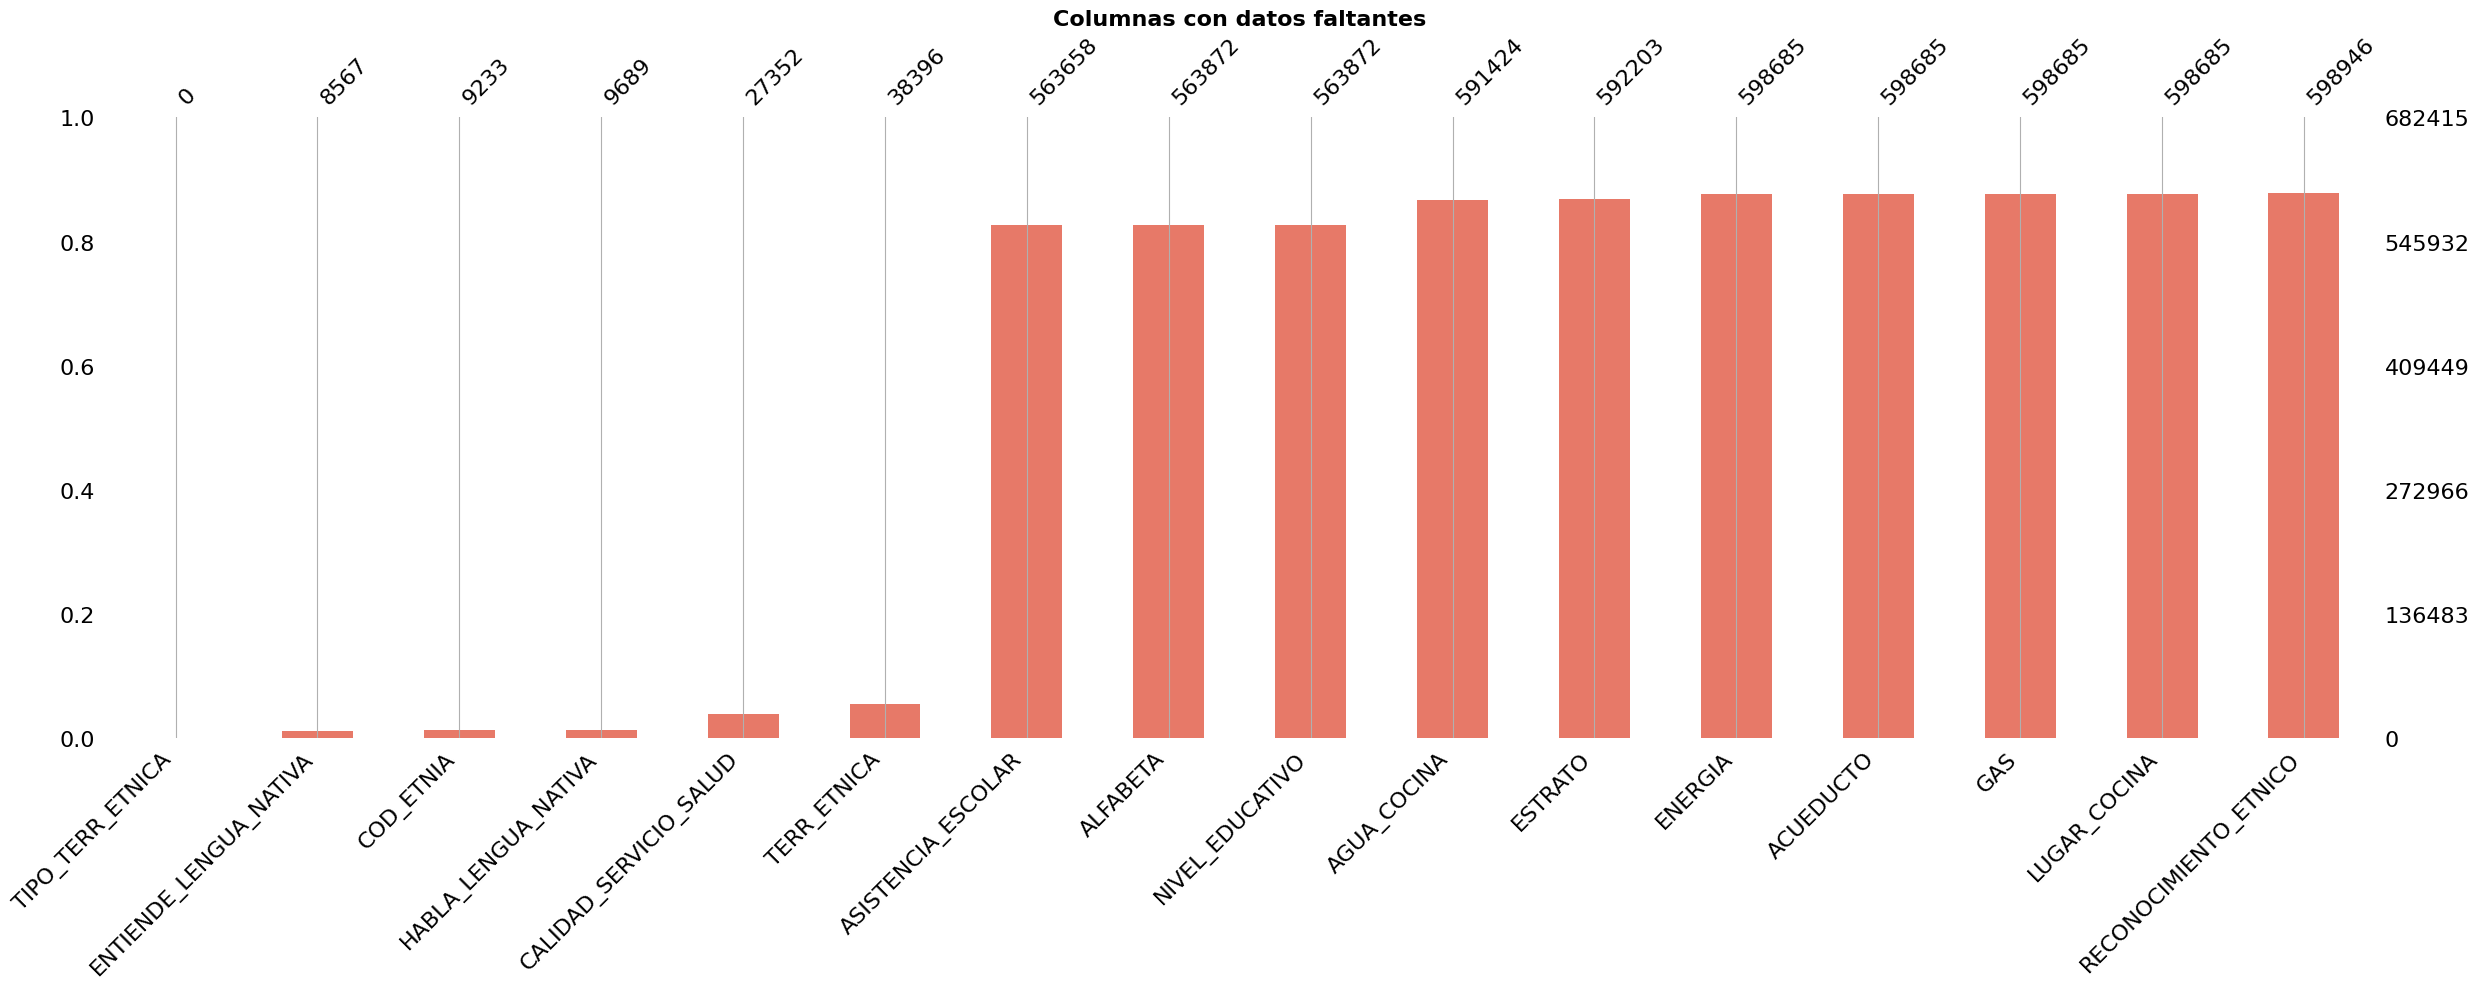

TIPO_TERR_ETNICA          100.000000
ENTIENDE_LENGUA_NATIVA     98.744606
COD_ETNIA                  98.647011
HABLA_LENGUA_NATIVA        98.580189
CALIDAD_SERVICIO_SALUD     95.991882
TERR_ETNICA                94.373512
ASISTENCIA_ESCOLAR         17.402460
ALFABETA                   17.371101
NIVEL_EDUCATIVO            17.371101
AGUA_COCINA                13.333675
ESTRATO                    13.219522
ENERGIA                    12.269660
ACUEDUCTO                  12.269660
GAS                        12.269660
LUGAR_COCINA               12.269660
RECONOCIMIENTO_ETNICO      12.231413
dtype: float64

In [25]:
analizar_columnas_faltantes(df_dane_atlantico)

In [681]:
df_dane_atlantico.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,BARANOA,16974
1,BARRANQUILLA,347124
2,CAMPO DE LA CRUZ,6175
3,CANDELARIA,3916
4,GALAPA,15786
5,JUAN DE ACOSTA,5943
6,LURUACO,7393
7,MALAMBO,33067
8,MANATÍ,4419
9,PALMAR DE VARELA,6883


### **Departamento: Bolívar**

In [682]:
data_vivienda_dane = df_bolivar_viviendas
data_personas_dane = df_bolivar_personas
data_hogares_dane = df_bolivar_hogares
data_georeferenciacion_dane = df_bolivar_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (599159, 30)
Hogares: (542915, 13)
Personas: (1909460, 48)
Georeferenciación: (599159, 14)


In [683]:
df_dane_bolivar = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_bolivar = departamentos_municipios(df_dane_bolivar, data_divipola)
df_dane_bolivar = df_dane_bolivar.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_bolivar.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
1,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010111,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,9.0,NaN,NaN,NaN,9.0,9.0,99.0,NaN
2,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010111,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,3.0,NaN
3,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010111,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
4,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,8.0,NaN


In [684]:
manzanas_filtradas = df_dane_bolivar[df_dane_bolivar['COD_MANZANA'] == '1300110000000023010104']
manzanas_filtradas


,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
4,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,8.0,NaN
5,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
9,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,7.0,NaN
10,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
13,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,9.0,NaN,NaN,NaN,9.0,9.0,99.0,NaN
15,CARTAGENA DE INDIAS,BOLÍVAR,13,001,1300110000000023010104,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,5.0,NaN


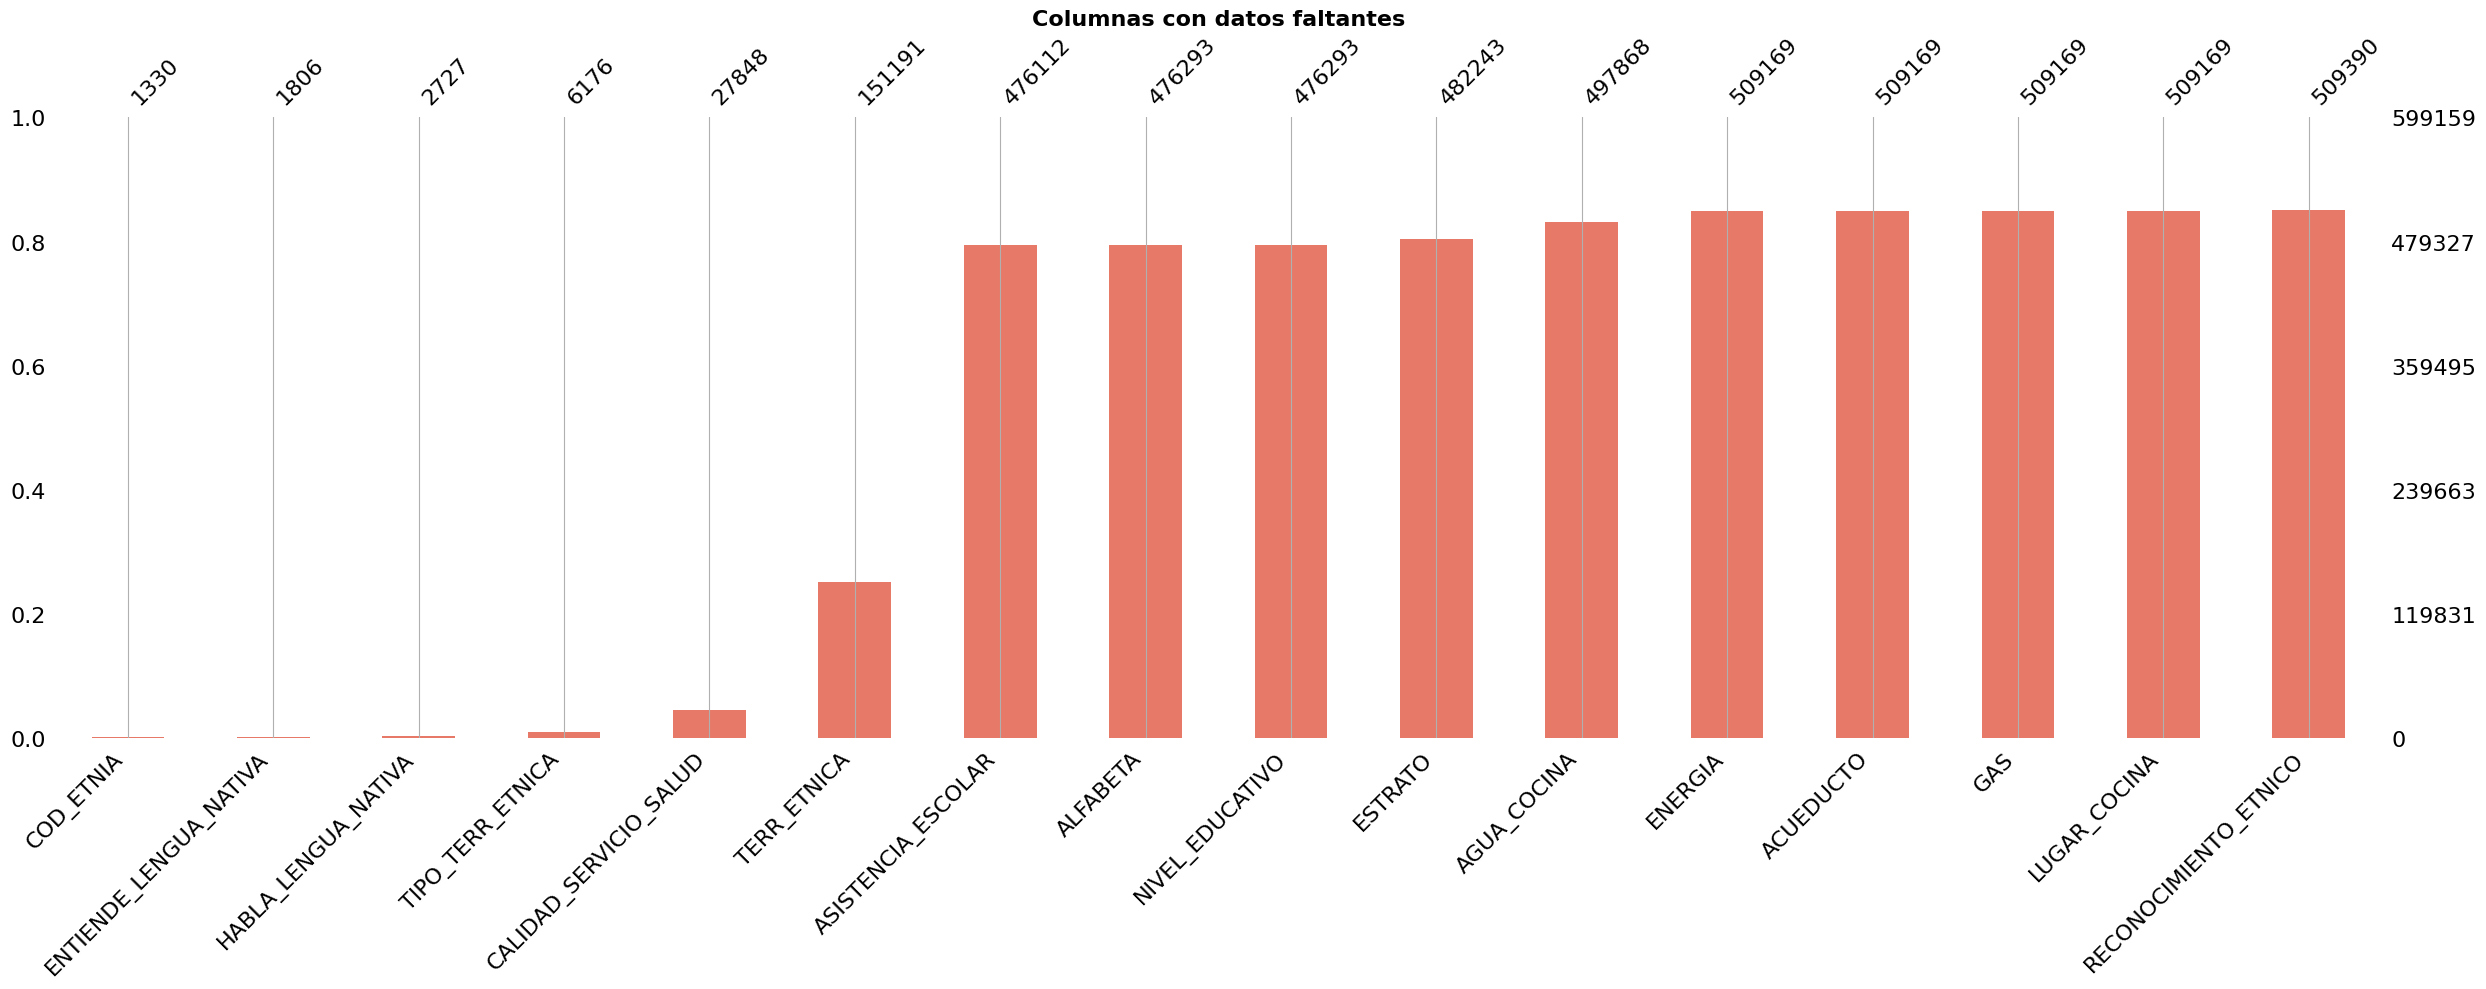

COD_ETNIA                 99.778022
ENTIENDE_LENGUA_NATIVA    99.698578
HABLA_LENGUA_NATIVA       99.544862
TIPO_TERR_ETNICA          98.969222
CALIDAD_SERVICIO_SALUD    95.352152
TERR_ETNICA               74.766131
ASISTENCIA_ESCOLAR        20.536619
ALFABETA                  20.506410
NIVEL_EDUCATIVO           20.506410
ESTRATO                   19.513351
AGUA_COCINA               16.905529
ENERGIA                   15.019386
ACUEDUCTO                 15.019386
GAS                       15.019386
LUGAR_COCINA              15.019386
RECONOCIMIENTO_ETNICO     14.982500
dtype: float64

In [685]:
analizar_columnas_faltantes(df_dane_bolivar)

In [686]:
df_dane_bolivar.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,ACHÍ,5970
1,ALTOS DEL ROSARIO,2639
2,ARENAL,2368
3,ARJONA,19396
4,ARROYOHONDO,1872
5,BARRANCO DE LOBA,4577
6,CALAMAR,6187
7,CANTAGALLO,2753
8,CARTAGENA DE INDIAS,294627
9,CICUCO,3629


### **Departamento: Cesar**

In [687]:
data_vivienda_dane = df_cesar_viviendas
data_personas_dane = df_cesar_personas
data_hogares_dane = df_cesar_hogares
data_georeferenciacion_dane = df_cesar_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (354629, 30)
Hogares: (316816, 13)
Personas: (1098577, 48)
Georeferenciación: (354629, 14)


In [688]:
df_dane_cesar = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_cesar = departamentos_municipios(df_dane_cesar, data_divipola)
df_dane_cesar = df_dane_cesar.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_cesar.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,VALLEDUPAR,CESAR,20,001,2000110000000000280105,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN
1,VALLEDUPAR,CESAR,20,001,2000110000000000280106,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,8.0,NaN
2,VALLEDUPAR,CESAR,20,001,2000110000000000280105,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
3,VALLEDUPAR,CESAR,20,001,2000110000000000280105,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
4,VALLEDUPAR,CESAR,20,001,2000110000000000450649,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,4.0,NaN


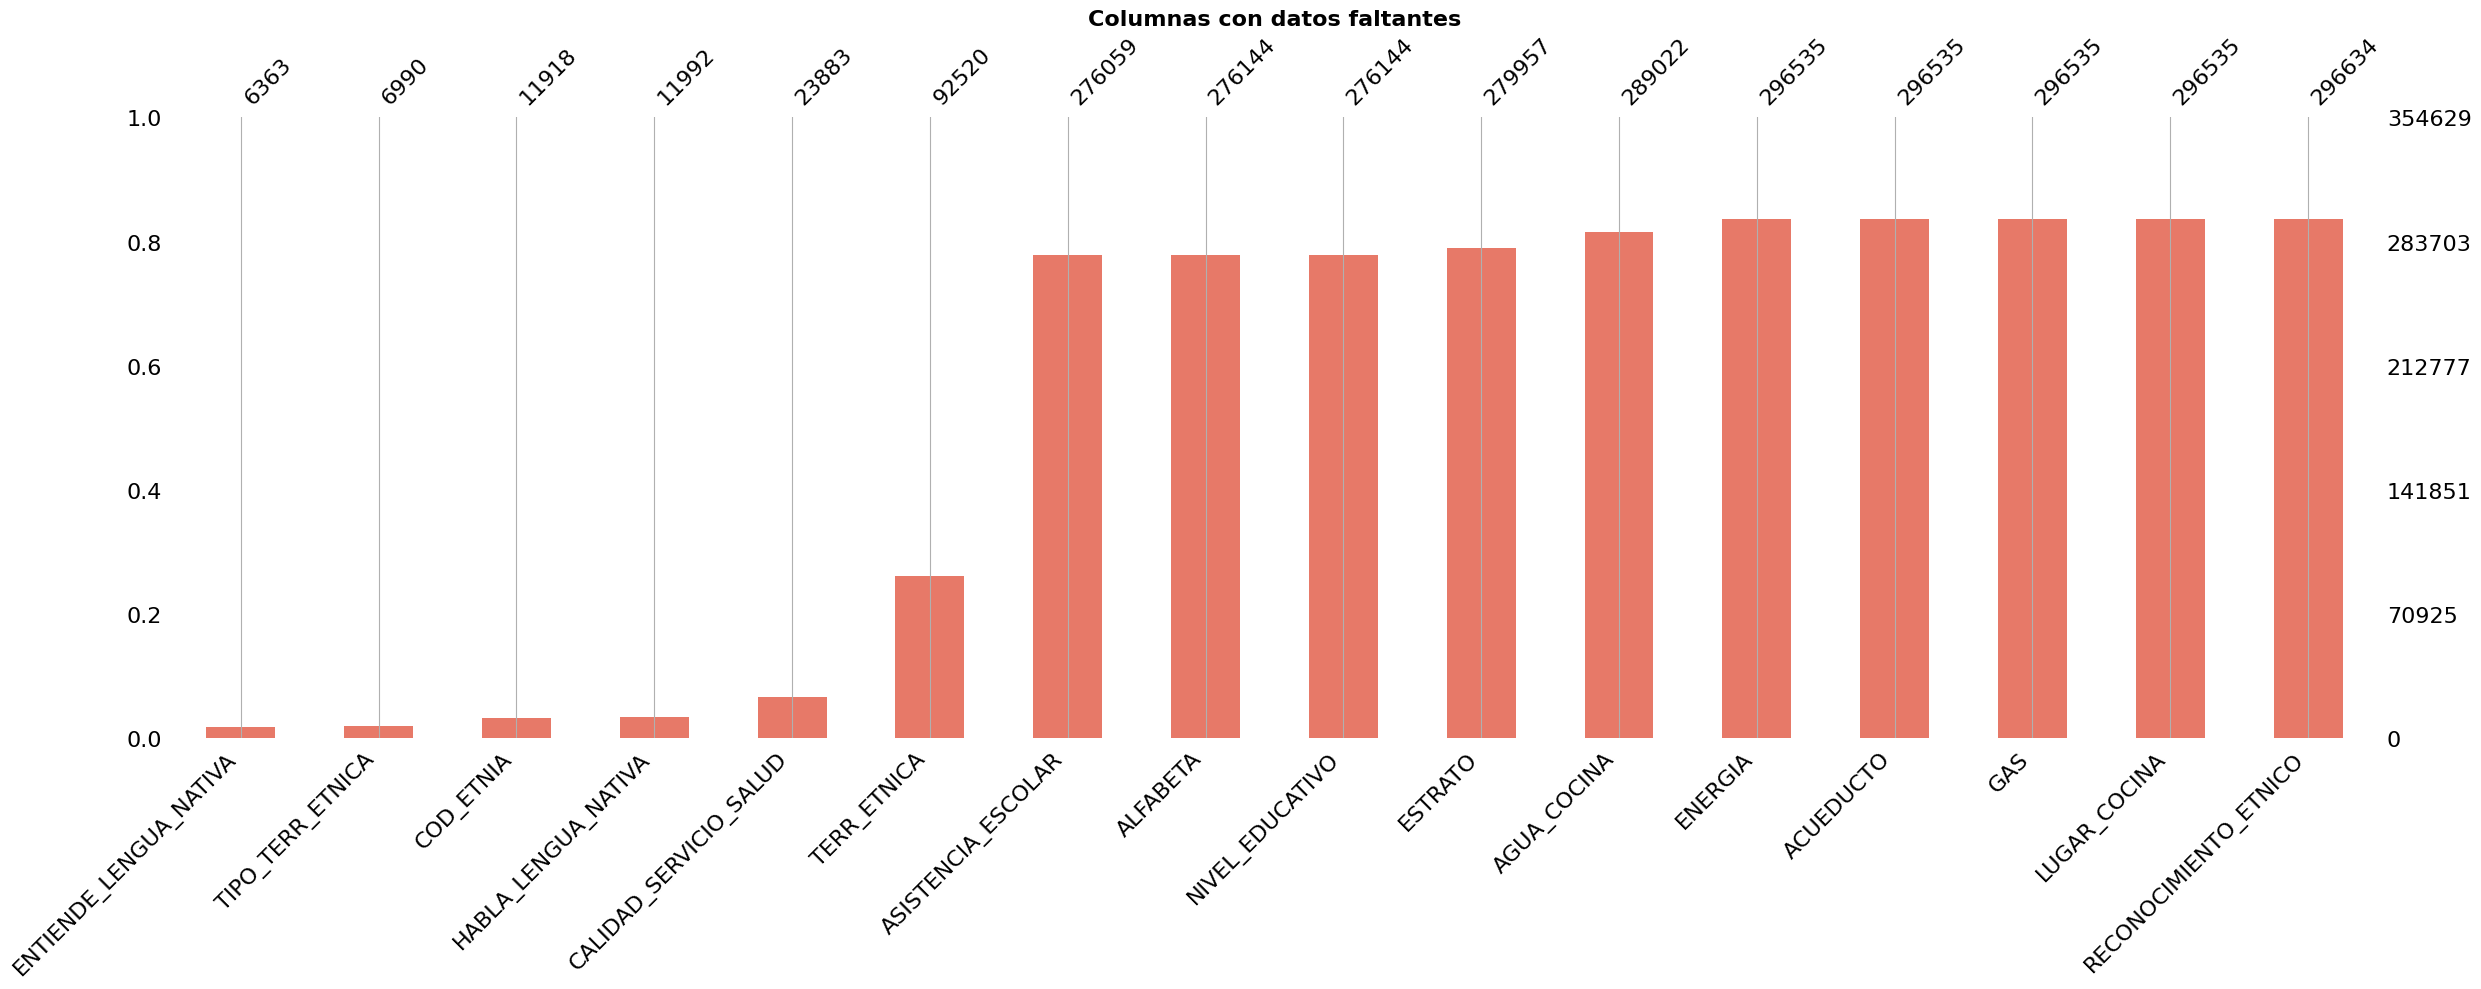

ENTIENDE_LENGUA_NATIVA    98.205730
TIPO_TERR_ETNICA          98.028926
COD_ETNIA                 96.639305
HABLA_LENGUA_NATIVA       96.618438
CALIDAD_SERVICIO_SALUD    93.265356
TERR_ETNICA               73.910763
ASISTENCIA_ESCOLAR        22.155548
ALFABETA                  22.131580
NIVEL_EDUCATIVO           22.131580
ESTRATO                   21.056372
AGUA_COCINA               18.500179
ENERGIA                   16.381627
ACUEDUCTO                 16.381627
GAS                       16.381627
LUGAR_COCINA              16.381627
RECONOCIMIENTO_ETNICO     16.353710
dtype: float64

In [689]:
analizar_columnas_faltantes(df_dane_cesar)

In [690]:
df_dane_cesar.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,AGUACHICA,33419
1,AGUSTÍN CODAZZI,18449
2,ASTREA,5278
3,BECERRIL,6532
4,BOSCONIA,11553
5,CHIMICHAGUA,9497
6,CHIRIGUANÁ,9647
7,CURUMANÍ,11649
8,EL COPEY,9172
9,EL PASO,12314


### **Departamento: Córdoba**

In [691]:
data_vivienda_dane = df_cordoba_viviendas
data_personas_dane = df_cordoba_personas
data_hogares_dane = df_cordoba_hogares
data_georeferenciacion_dane = df_cordoba_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (465618, 30)
Hogares: (466732, 13)
Personas: (1555596, 48)
Georeferenciación: (465618, 14)


In [692]:
df_dane_cordoba = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_cordoba = departamentos_municipios(df_dane_cordoba, data_divipola)
df_dane_cordoba = df_dane_cordoba.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_cordoba.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,MONTERÍA,CÓRDOBA,23,001,2300110000000000140314,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,9.0,NaN
1,MONTERÍA,CÓRDOBA,23,001,2300110000000000140313,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
2,MONTERÍA,CÓRDOBA,23,001,2300110000000000110115,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,3.0,NaN
3,MONTERÍA,CÓRDOBA,23,001,2300110000000000080524,NaN,NaN,4.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,7.0,NaN
4,MONTERÍA,CÓRDOBA,23,001,2300110000000000080524,NaN,NaN,4.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN


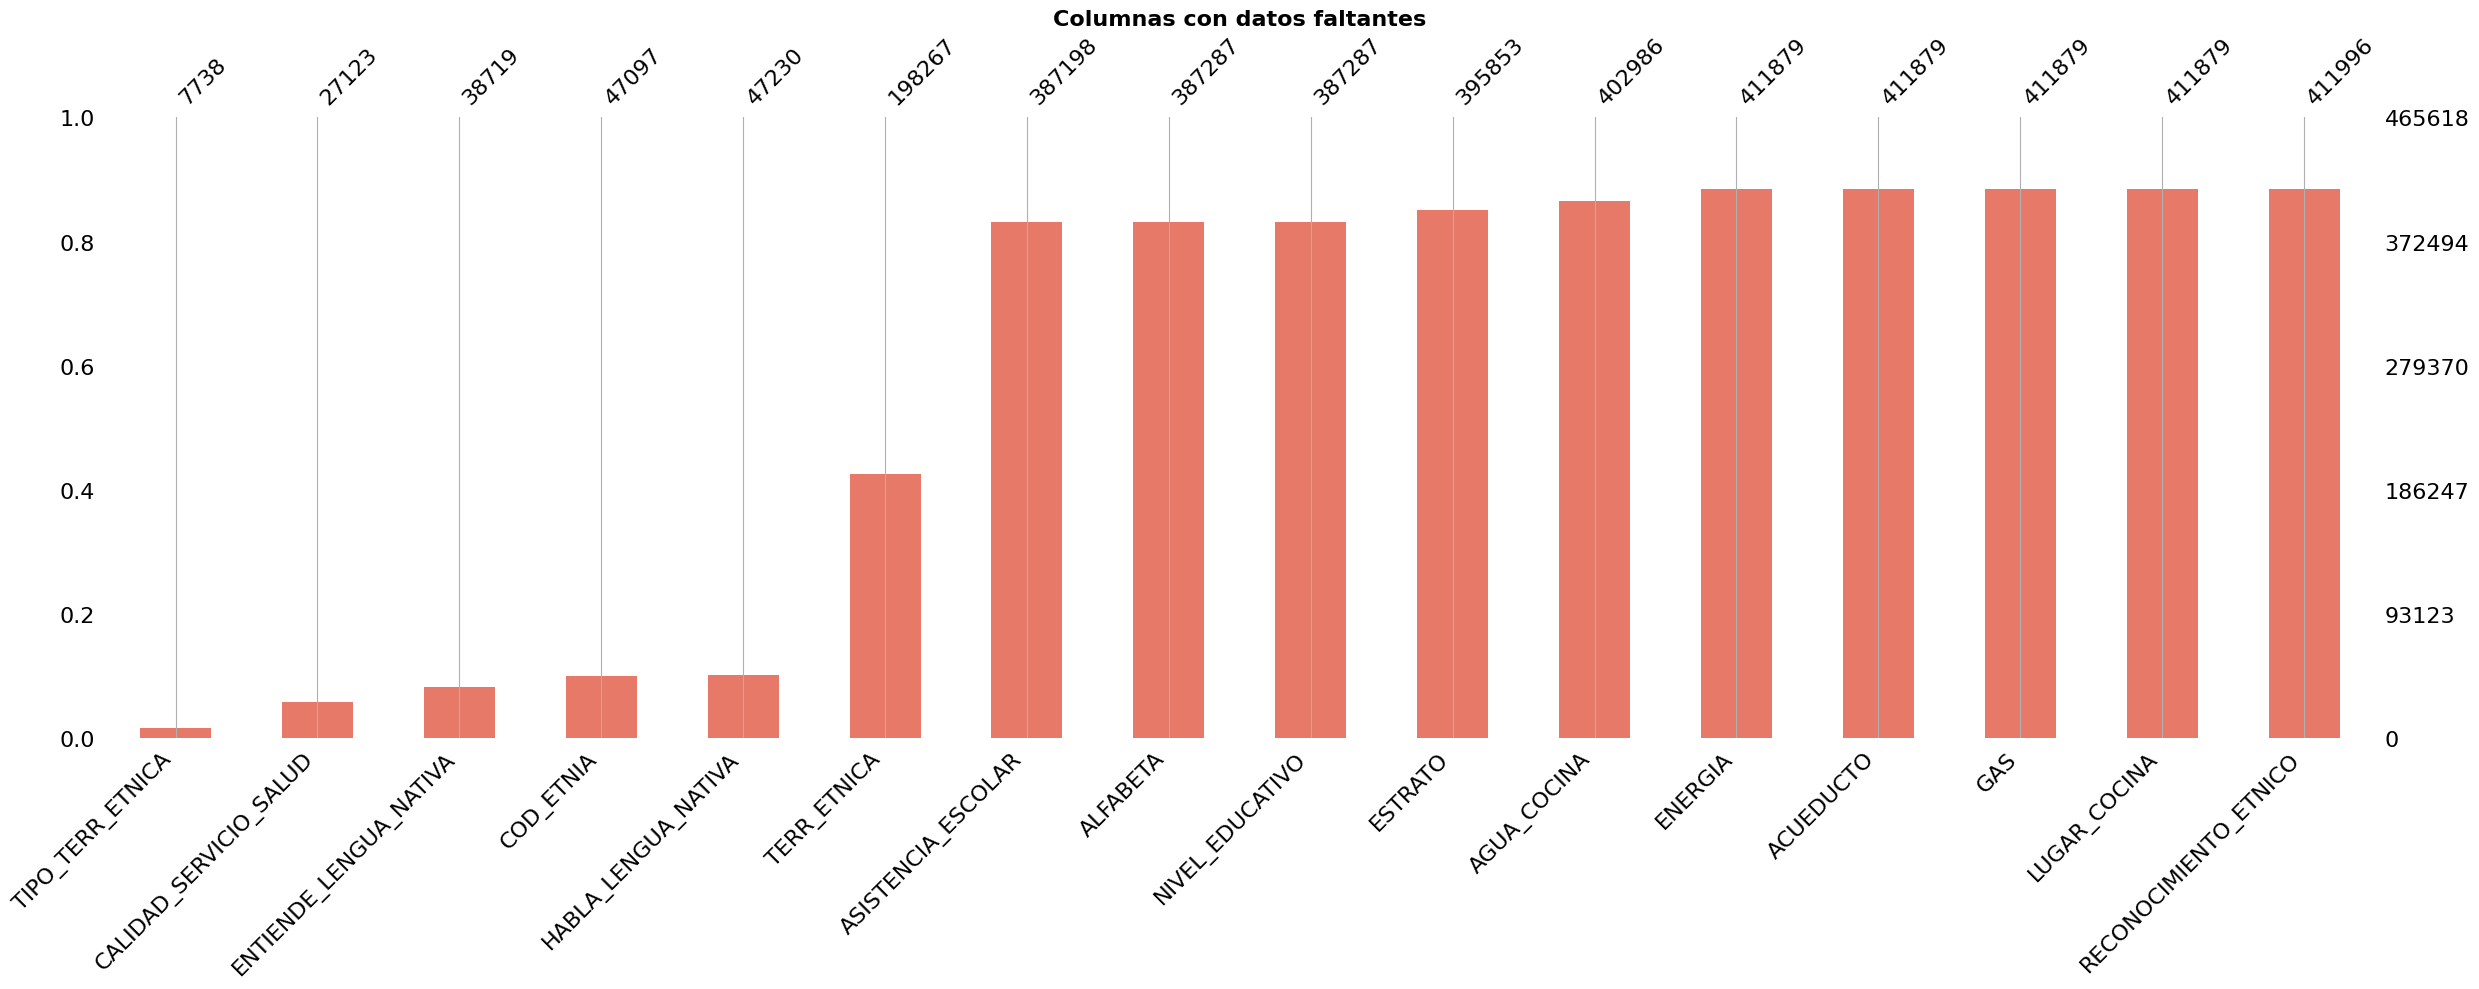

TIPO_TERR_ETNICA          98.338123
CALIDAD_SERVICIO_SALUD    94.174839
ENTIENDE_LENGUA_NATIVA    91.684385
COD_ETNIA                 89.885056
HABLA_LENGUA_NATIVA       89.856492
TERR_ETNICA               57.418528
ASISTENCIA_ESCOLAR        16.842132
ALFABETA                  16.823018
NIVEL_EDUCATIVO           16.823018
ESTRATO                   14.983313
AGUA_COCINA               13.451370
ENERGIA                   11.541435
ACUEDUCTO                 11.541435
GAS                       11.541435
LUGAR_COCINA              11.541435
RECONOCIMIENTO_ETNICO     11.516307
dtype: float64

In [693]:
analizar_columnas_faltantes(df_dane_cordoba)

In [694]:
df_dane_cordoba.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,AYAPEL,11601
1,BUENAVISTA,5447
2,CANALETE,4364
3,CERETÉ,27329
4,CHIMÁ,3970
5,CHINÚ,13634
6,CIÉNAGA DE ORO,17163
7,COTORRA,4506
8,LA APARTADA,4218
9,LORICA,29984


### **Departamento: La Guajira**

In [695]:
data_vivienda_dane = df_guajira_viviendas
data_personas_dane = df_guajira_personas
data_hogares_dane = df_guajira_hogares
data_georeferenciacion_dane = df_guajira_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (239595, 30)
Hogares: (227428, 13)
Personas: (825364, 48)
Georeferenciación: (239595, 14)


In [696]:
df_dane_guajira = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_guajira = departamentos_municipios(df_dane_guajira, data_divipola)
df_dane_guajira = df_dane_guajira.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_guajira.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,RIOHACHA,LA GUAJIRA,44,001,4400110000000001040402,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RIOHACHA,LA GUAJIRA,44,001,4400110000000001040312,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,7.0,NaN
2,RIOHACHA,LA GUAJIRA,44,001,4400110000000001040415,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN
3,RIOHACHA,LA GUAJIRA,44,001,4400110000000004160207,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,9.0,9.0,99.0,NaN
4,RIOHACHA,LA GUAJIRA,44,001,4400110000000003090101,NaN,NaN,2.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,5.0,NaN


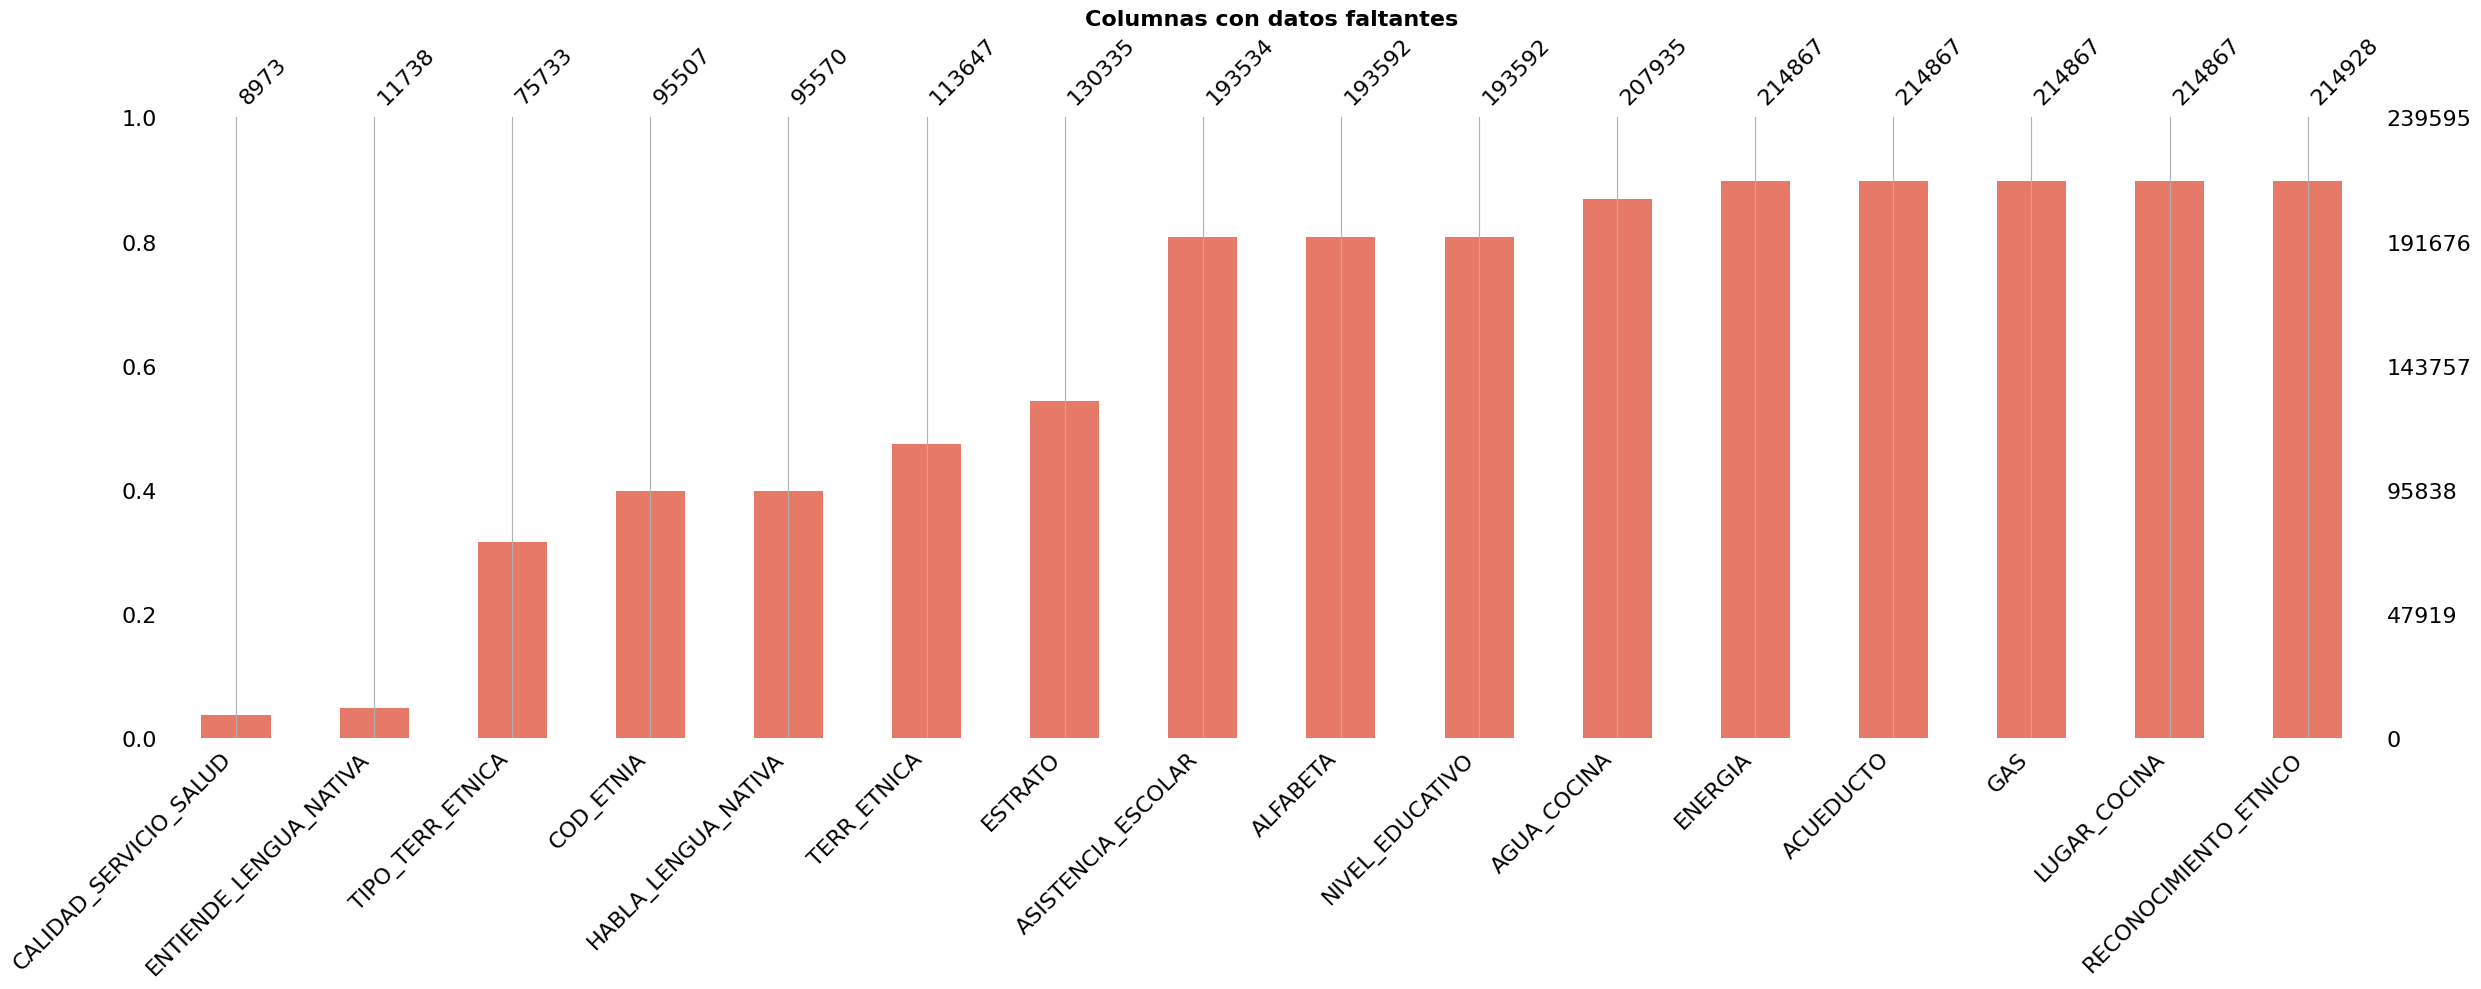

CALIDAD_SERVICIO_SALUD    96.254930
ENTIENDE_LENGUA_NATIVA    95.100899
TIPO_TERR_ETNICA          68.391244
COD_ETNIA                 60.138150
HABLA_LENGUA_NATIVA       60.111855
TERR_ETNICA               52.567040
ESTRATO                   45.601953
ASISTENCIA_ESCOLAR        19.224525
ALFABETA                  19.200317
NIVEL_EDUCATIVO           19.200317
AGUA_COCINA               13.213965
ENERGIA                   10.320750
ACUEDUCTO                 10.320750
GAS                       10.320750
LUGAR_COCINA              10.320750
RECONOCIMIENTO_ETNICO     10.295290
dtype: float64

In [697]:
analizar_columnas_faltantes(df_dane_guajira)

In [698]:
df_dane_guajira.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,ALBANIA,7335
1,BARRANCAS,8424
2,DIBULLA,9579
3,DISTRACCIÓN,3810
4,EL MOLINO,2431
5,FONSECA,12401
6,HATONUEVO,5593
7,LA JAGUA DEL PILAR,870
8,MAICAO,48151
9,MANAURE,20553


### **Departamento: Magdalena**

In [699]:
data_vivienda_dane = df_magdalena_viviendas
data_personas_dane = df_magdalena_personas
data_hogares_dane = df_magdalena_hogares
data_georeferenciacion_dane = df_magdalena_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (395154, 30)
Hogares: (343903, 13)
Personas: (1263788, 48)
Georeferenciación: (395154, 14)


In [700]:
df_dane_magdalena = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_magdalena = departamentos_municipios(df_dane_magdalena, data_divipola)
df_dane_magdalena = df_dane_magdalena.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_magdalena.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,SANTA MARTA,MAGDALENA,47,001,4700110000000000160107,NaN,NaN,3.0,1.0,1.0,...,1.0,4.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN
1,SANTA MARTA,MAGDALENA,47,001,4700110000000000750328,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,8.0,NaN
2,SANTA MARTA,MAGDALENA,47,001,4700110000000000070304,NaN,NaN,4.0,1.0,1.0,...,1.0,3.0,6.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
3,SANTA MARTA,MAGDALENA,47,001,4700110000000000570301,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,8.0,NaN
4,SANTA MARTA,MAGDALENA,47,001,4700110000000000160107,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN


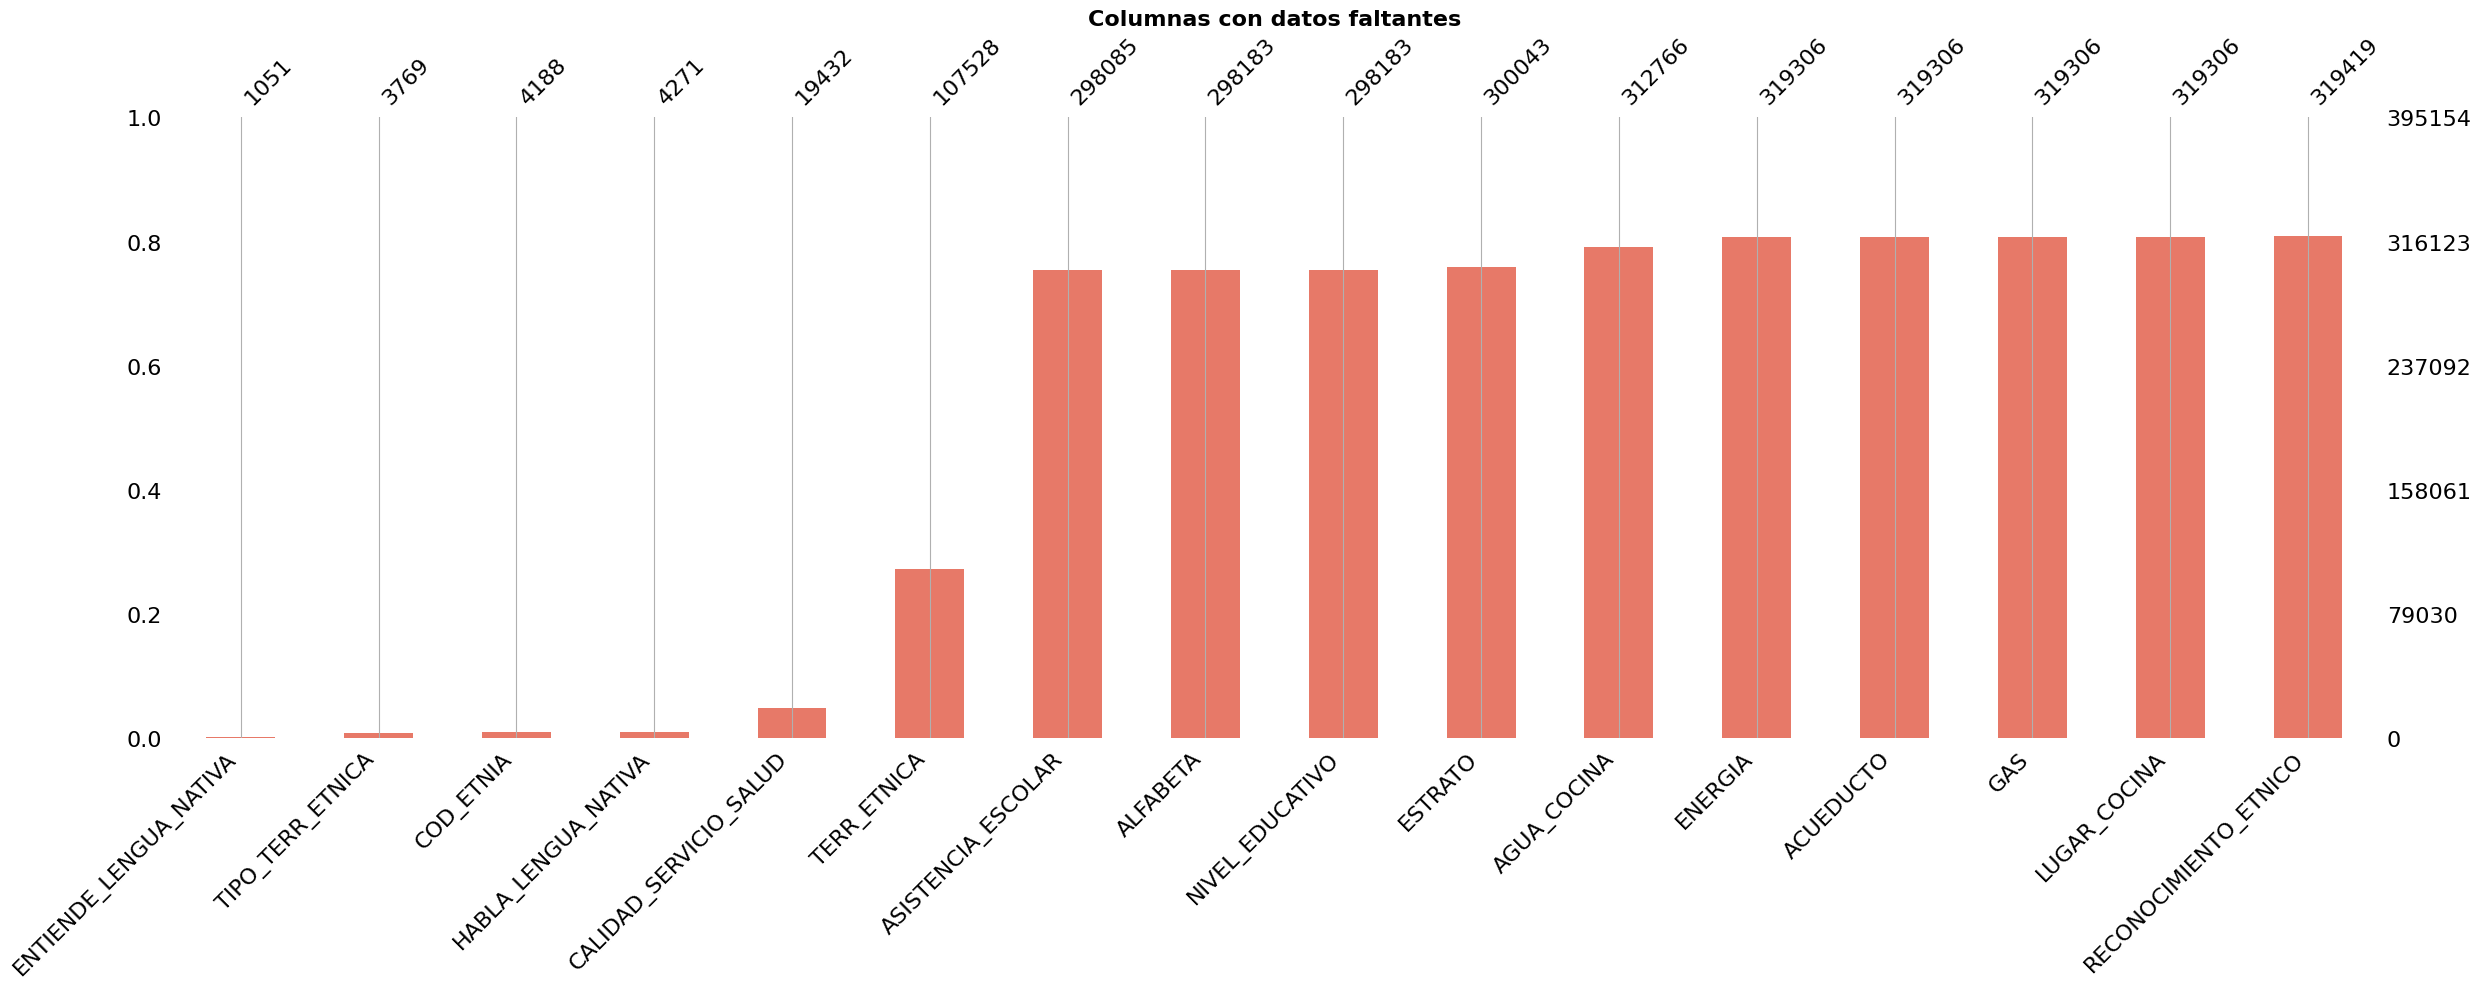

ENTIENDE_LENGUA_NATIVA    99.734028
TIPO_TERR_ETNICA          99.046195
COD_ETNIA                 98.940160
HABLA_LENGUA_NATIVA       98.919156
CALIDAD_SERVICIO_SALUD    95.082424
TERR_ETNICA               72.788331
ASISTENCIA_ESCOLAR        24.564853
ALFABETA                  24.540053
NIVEL_EDUCATIVO           24.540053
ESTRATO                   24.069350
AGUA_COCINA               20.849593
ENERGIA                   19.194542
ACUEDUCTO                 19.194542
GAS                       19.194542
LUGAR_COCINA              19.194542
RECONOCIMIENTO_ETNICO     19.165945
dtype: float64

In [701]:
analizar_columnas_faltantes(df_dane_magdalena)

In [702]:
df_dane_magdalena.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,ALGARROBO,3846
1,ARACATACA,9670
2,ARIGUANÍ,8566
3,CERRO DE SAN ANTONIO,2350
4,CHIVOLO,5466
5,CIÉNAGA,32188
6,CONCORDIA,3131
7,EL BANCO,16647
8,EL PIÑÓN,4975
9,EL RETÉN,5121


### **Departamento: Sucre**

In [703]:
data_vivienda_dane = df_sucre_viviendas
data_personas_dane = df_sucre_personas
data_hogares_dane = df_sucre_hogares
data_georeferenciacion_dane = df_sucre_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (268212, 30)
Hogares: (240101, 13)
Personas: (864036, 48)
Georeferenciación: (268212, 14)


In [704]:
df_dane_sucre = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_sucre = departamentos_municipios(df_dane_sucre, data_divipola)
df_dane_sucre = df_dane_sucre.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_sucre.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,SINCELEJO,SUCRE,70,001,7000110000000000010136,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,7.0,NaN
1,SINCELEJO,SUCRE,70,001,7000110000000000081108,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,2.0,2.0,10.0,NaN
2,SINCELEJO,SUCRE,70,001,7000110000000000070126,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SINCELEJO,SUCRE,70,001,7000110000000000070124,NaN,NaN,3.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN
4,SINCELEJO,SUCRE,70,001,7000110000000000081121,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN


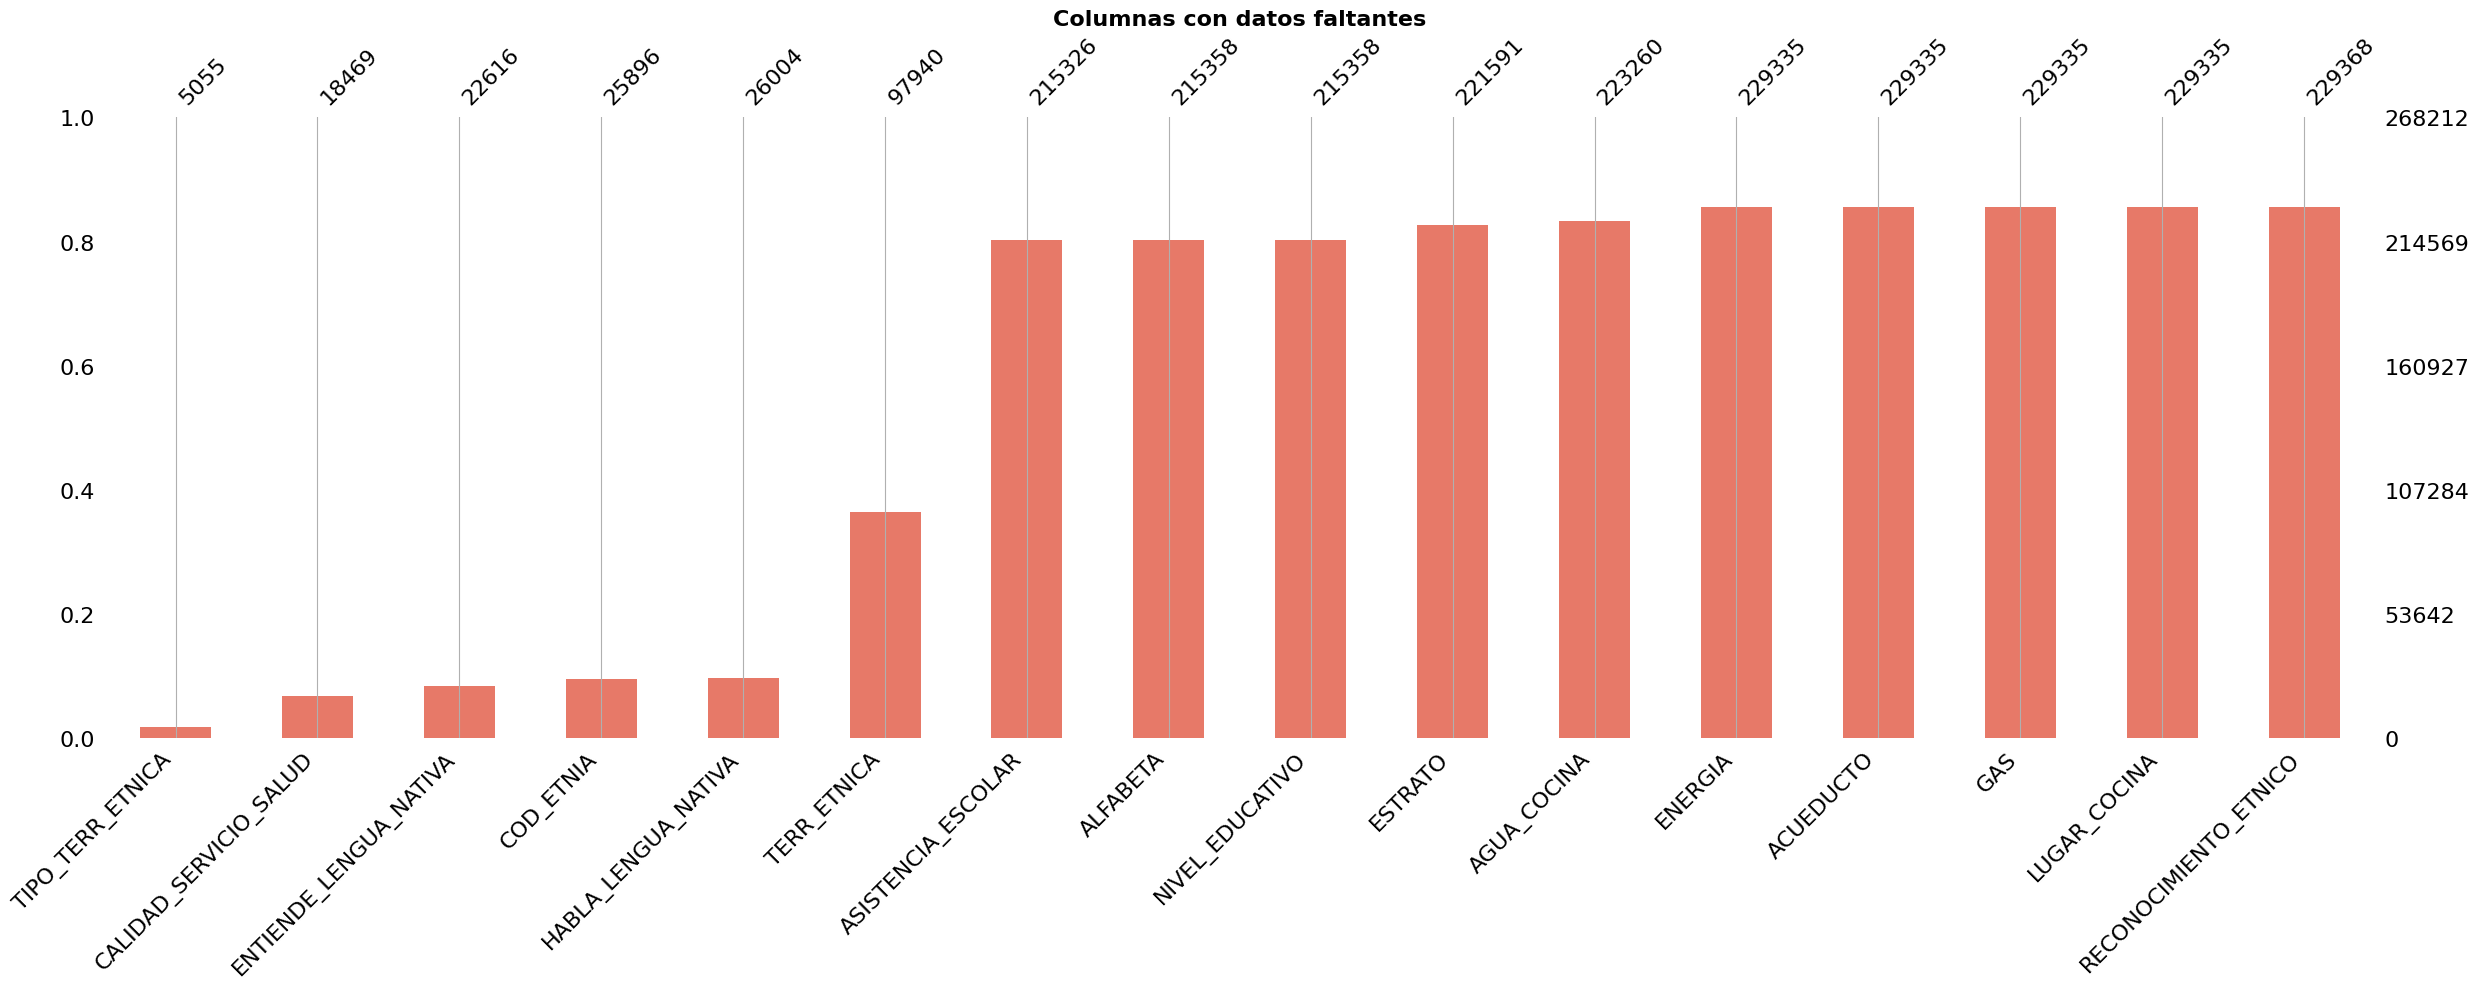

TIPO_TERR_ETNICA          98.115297
CALIDAD_SERVICIO_SALUD    93.114029
ENTIENDE_LENGUA_NATIVA    91.567864
COD_ETNIA                 90.344951
HABLA_LENGUA_NATIVA       90.304684
TERR_ETNICA               63.484110
ASISTENCIA_ESCOLAR        19.717984
ALFABETA                  19.706053
NIVEL_EDUCATIVO           19.706053
ESTRATO                   17.382145
AGUA_COCINA               16.759877
ENERGIA                   14.494877
ACUEDUCTO                 14.494877
GAS                       14.494877
LUGAR_COCINA              14.494877
RECONOCIMIENTO_ETNICO     14.482573
dtype: float64

In [705]:
analizar_columnas_faltantes(df_dane_sucre)

In [706]:
df_dane_sucre.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,BUENAVISTA,2976
1,CAIMITO,3567
2,CHALÁN,1275
3,COLOSO,2410
4,COROZAL,19958
5,COVEÑAS,7554
6,EL ROBLE,3108
7,GALERAS,5907
8,GUARANDA,4600
9,LA UNIÓN,3238


### **Departamento: San Andrés y Providencia**

In [707]:
data_vivienda_dane = df_sanandres_viviendas
data_personas_dane = df_sanandres_personas
data_hogares_dane = df_sanandres_hogares
data_georeferenciacion_dane = df_sanandres_geo

dataframes = {
    'Vivienda': data_vivienda_dane,
    'Hogares': data_hogares_dane,
    'Personas': data_personas_dane,
    'Georeferenciación': data_georeferenciacion_dane
}

for nombre, df in dataframes.items():
    print(f"{nombre}: {df.shape}")


Vivienda: (18423, 30)
Hogares: (16367, 13)
Personas: (48299, 48)
Georeferenciación: (18423, 14)


In [708]:
df_dane_sanandres = preparar_datos(data_vivienda_dane, data_georeferenciacion_dane, data_hogares_dane, data_personas_dane)
df_dane_sanandres = departamentos_municipios(df_dane_sanandres, data_divipola)
df_dane_sanandres = df_dane_sanandres.rename(columns=renombrar_columnas)[orden_columnas]
df_dane_sanandres.head()

,MUNICIPIO,DEPARTAMENTO,COD_DPTO,COD_MPIO,COD_MANZANA,TERR_ETNICA,TIPO_TERR_ETNICA,ESTRATO,ENERGIA,ACUEDUCTO,...,AGUA_COCINA,LUGAR_COCINA,RECONOCIMIENTO_ETNICO,COD_ETNIA,HABLA_LENGUA_NATIVA,ENTIENDE_LENGUA_NATIVA,ALFABETA,ASISTENCIA_ESCOLAR,NIVEL_EDUCATIVO,CALIDAD_SERVICIO_SALUD
0,SAN ANDRÉS,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,88,001,8800110000000000021002,NaN,NaN,3.0,1.0,2.0,...,11.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,7.0,NaN
1,SAN ANDRÉS,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,88,001,8800110000000000021001,NaN,NaN,2.0,1.0,2.0,...,11.0,3.0,5.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN
2,SAN ANDRÉS,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,88,001,8800110000000000021041,NaN,NaN,2.0,1.0,2.0,...,11.0,1.0,6.0,NaN,NaN,NaN,1.0,2.0,3.0,NaN
3,SAN ANDRÉS,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,88,001,8800110000000000021041,NaN,NaN,1.0,1.0,2.0,...,11.0,3.0,5.0,NaN,NaN,NaN,1.0,2.0,8.0,NaN
4,SAN ANDRÉS,ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SAN...,88,001,8800110000000000021033,NaN,NaN,2.0,1.0,2.0,...,11.0,1.0,6.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN


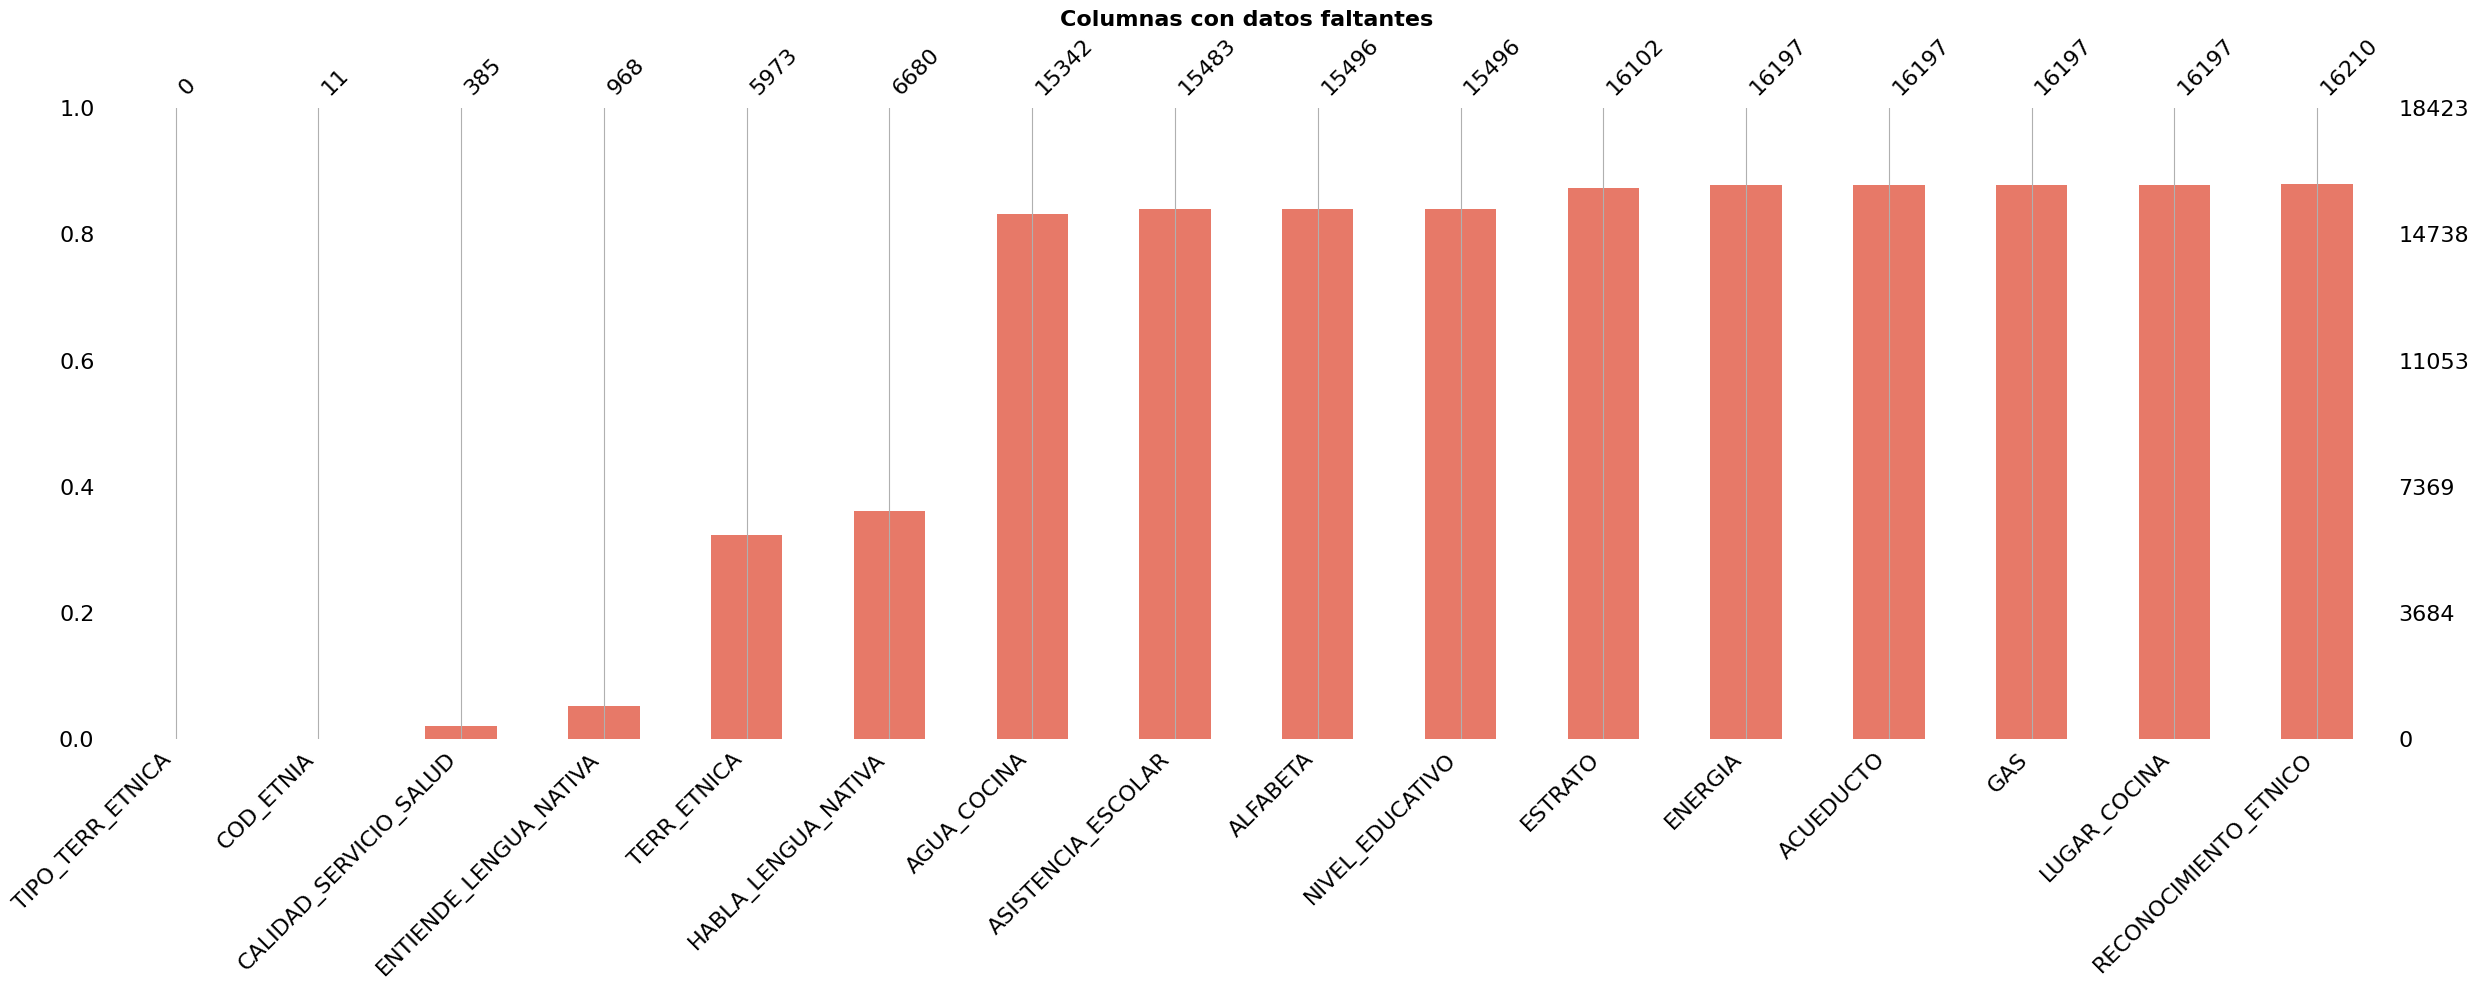

TIPO_TERR_ETNICA          100.000000
COD_ETNIA                  99.940292
CALIDAD_SERVICIO_SALUD     97.910221
ENTIENDE_LENGUA_NATIVA     94.745698
TERR_ETNICA                67.578570
HABLA_LENGUA_NATIVA        63.740976
AGUA_COCINA                16.723661
ASISTENCIA_ESCOLAR         15.958313
ALFABETA                   15.887749
NIVEL_EDUCATIVO            15.887749
ESTRATO                    12.598382
ENERGIA                    12.082723
ACUEDUCTO                  12.082723
GAS                        12.082723
LUGAR_COCINA               12.082723
RECONOCIMIENTO_ETNICO      12.012159
dtype: float64

In [709]:
analizar_columnas_faltantes(df_dane_sanandres)

In [710]:
df_dane_sanandres.groupby('MUNICIPIO').size().reset_index(name='casos')

,MUNICIPIO,casos
0,PROVIDENCIA,2005
1,SAN ANDRÉS,16418


### **Unión de departamentos**

In [711]:
df_dane_2018 = pd.concat([df_dane_atlantico, df_dane_bolivar, df_dane_cesar, df_dane_cordoba, df_dane_guajira, df_dane_magdalena, df_dane_sucre, df_dane_sanandres], ignore_index=True)

In [712]:
df_dane_2018.shape

(3023205, 21)

#### **Datos faltantes global**

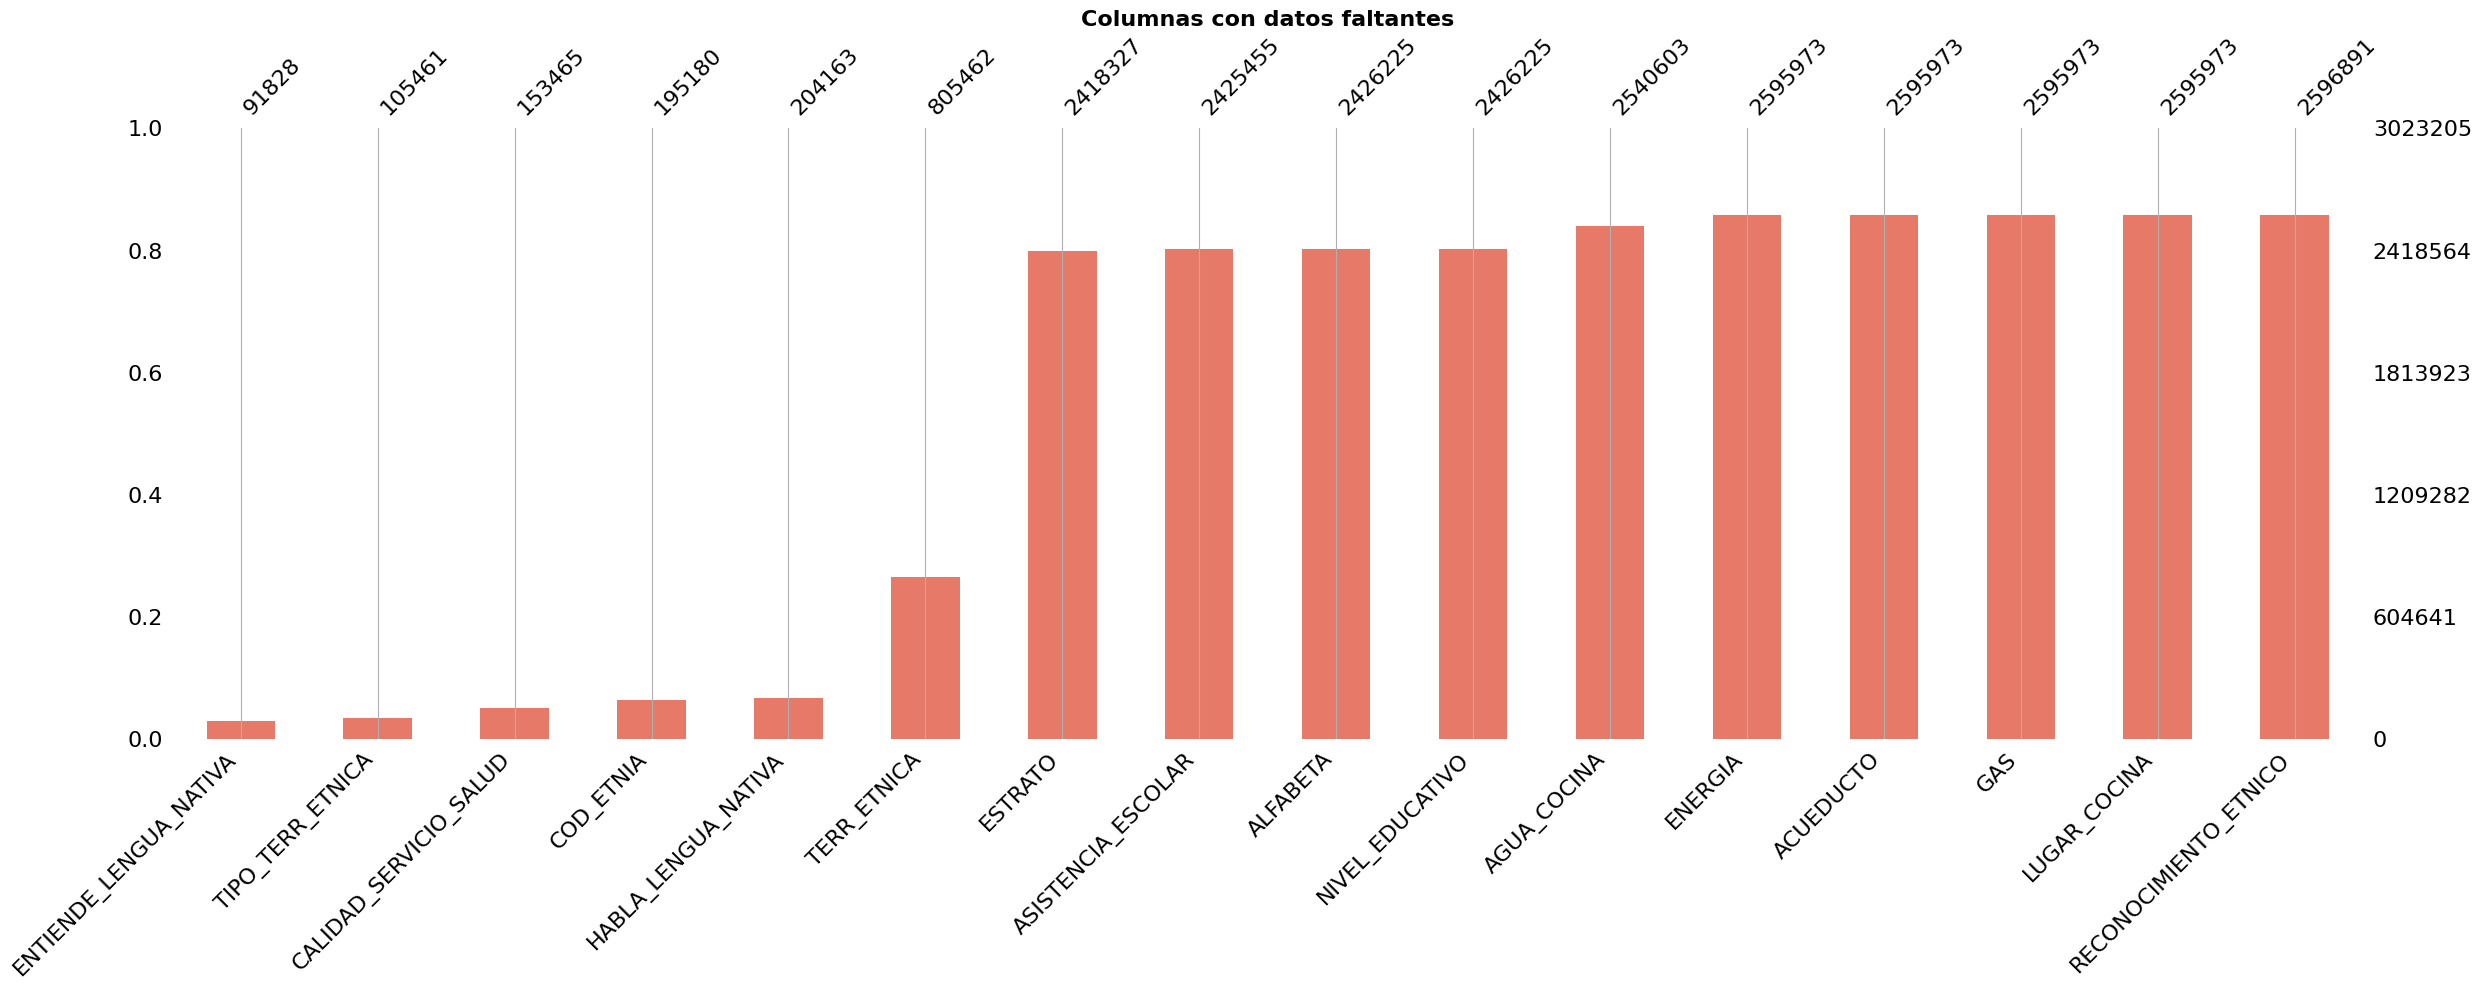

ENTIENDE_LENGUA_NATIVA    96.962561
TIPO_TERR_ETNICA          96.511616
CALIDAD_SERVICIO_SALUD    94.923765
COD_ETNIA                 93.543938
HABLA_LENGUA_NATIVA       93.246803
TERR_ETNICA               73.357348
ESTRATO                   20.007839
ASISTENCIA_ESCOLAR        19.772063
ALFABETA                  19.746593
NIVEL_EDUCATIVO           19.746593
AGUA_COCINA               15.963258
ENERGIA                   14.131758
ACUEDUCTO                 14.131758
GAS                       14.131758
LUGAR_COCINA              14.131758
RECONOCIMIENTO_ETNICO     14.101392
dtype: float64

In [713]:
analizar_columnas_faltantes(df_dane_2018)

#### **Renombrado de categorías**

In [714]:
df_dane_2018['TERR_ETNICA'] = df_dane_2018['TERR_ETNICA'].map({1:'SI', 2:'NO'})
df_dane_2018['TIPO_TERR_ETNICA'] = df_dane_2018['TIPO_TERR_ETNICA'].map({1:'Resguardo Indígena', 2:'Territorio Colectivo de Comunidad Negra'})
df_dane_2018['ESTRATO'] = df_dane_2018['ESTRATO'].map({0:'Sin Estrato', 1:'Estrato 1', 2:'Estrato 2', 3:'Estrato 3', 4:'Estrato 4', 5:'Estrato 5', 6:'Estrato 6', 9:'No informa'})
df_dane_2018['ENERGIA'] = df_dane_2018['ENERGIA'].map({1:'SI', 2:'NO'})
df_dane_2018['ACUEDUCTO'] = df_dane_2018['ACUEDUCTO'].map({1:'SI', 2:'NO'})
df_dane_2018['GAS'] = df_dane_2018['GAS'].map({1:'SI', 2:'NO', 3:'No Informa'})


In [715]:
df_dane_2018['AGUA_COCINA'] = df_dane_2018['AGUA_COCINA'].replace({
    1: 'Acueducto público', 2: 'Acueducto veredal', 3: 'Red de distribución comunitaria',4: 'Pozo con bomba',
    5: 'Pozo sin bomba',6: 'Agua lluvia', 7: 'Río, quebrada, manantial, nacimiento',8: 'Pila pública',
    9: 'Carrotanque',10: 'Aguatero', 11: 'Agua embotellada o en bolsa',12: 'No preparan alimentos', 99: 'No Informa'})

df_dane_2018['LUGAR_COCINA'] = df_dane_2018['LUGAR_COCINA'].replace({1: 'Solo cocina', 2: 'Dormitorio', 3: 'Sala / Comedor con lavaplatos',
    4: 'Sala / Comedor sin lavaplatos', 5: 'Patio o aire libre', 6: 'No cocinan', 9: 'No Informa'})

In [716]:
df_dane_2018['RECONOCIMIENTO_ETNICO'] = df_dane_2018['RECONOCIMIENTO_ETNICO'].replace({
    1: 'Indígena', 2: 'Gitano(a) o Rrom',
    3: 'Raizal', # Raizal: población afrodescendiente de las islas de San Andrés y Providencia.
    4: 'Palenquero(a)', # Palenquero: población afrodescendiente de San Basilio de Palenque.
    5: 'Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a)',
    6: 'Ningún grupo étnico',
    9: 'No Informa'
})

In [717]:
df_dane_2018['COD_ETNIA'] = df_dane_2018['COD_ETNIA'].replace({
    10: 'Achagua', 20: 'Amorua', 21: 'Uipiue', 25: 'Yamalero', 26: 'Yaruro', 30: 'Andoke', 40: 'Arhuaca', 50: 'Arsaria', 60: 'Bara', 70: 'Barasana',
    80: 'Bari', 90: 'Betoye', 100: 'Bora', 110: 'Cabiyari', 120: 'Carabayo', 128: 'No Aplica', 130: 'Carapana', 140: 'Carifuna', 150: 'Chimila', 
    160: 'Chiricoa', 170: 'Cocama', 180: 'Coconuco', 190: 'Corebahu', 200: 'Coyaima', 210: 'Awa', 220: 'Cobewa', 230: 'Cuiba', 240: 'Bayano',
    250: 'Curripaca', 251: 'Baniba', 252: 'Guariquema', 260: 'Desana', 270: 'Dujos', 280: 'Ebera', 281: 'Catio', 282: 'Chami', 283: 'Eepera', 
    284: 'Embera-Dobida', 285: 'Nutabe', 290: 'Guambiana', 291: 'Ambalo', 292: 'Kizgo', 300: 'Guanaca', 310: 'Guanana', 320: 'Cunimia', 
    330: 'Cañamomo', 340: 'Imga', 350: 'Cache', 360: 'Cofan', 370: 'Coghi', 380: 'Detuama', 390: 'Auirubain', 400: 'Hitnu', 401: 'Macaguane', 410: 'Buhagana',
    430: 'Makusa', 431: 'Cacua', 432: 'Hupdu', 433: 'Juhup', 434: 'Judpa', 435: 'Macu', 440: 'Maiben', 450: 'Jupichiya', 451: 'Hurumi', 455: 'Je´Eruriwa', 
    460: 'Miraña', 470: 'Chibcha', 480: 'Nonuya', 490: 'Diocaya', 500: 'Nasa', 501: 'Polindara', 505: 'Andakies', 510: 'Cuipaco', 
    520: 'Dearua', 530: 'Parata-Puya', 540: 'Papiua', 550: 'Guaipunare', 560: 'Pasto', 565: 'Killacinga', 570: 'Saliba', 580: 'Guahiba', 
    585: 'Mapayerri', 590: 'Ceona', 600: 'Chiranga', 610: 'Eduria', 620: 'Ohañara', 621: 'Tanigua', 630: 'Tariana', 640: 'Juna', 
    650: 'Totoro', 660: 'Ticuna', 661: 'Pasee', 670: 'Mariposo', 680: 'Dasea', 690: 'Lache', 700: 'Dojkapuara', 710: 'Noanama', 
    720: 'Guajiro', 730: 'Bue', 731: 'Muinane', 732: 'Yari', 740: 'Mishara', 750: 'Mitimae', 760: 'Camejeya', 770: 'Mapapi', 780: 'Yuco', 790: 'Totsoca',
    800: 'Senu', 810: 'Guane', 820: 'Mokana', 830: 'Otavaleña', 840: 'Kichwa', 850: 'Kamkuamo', 855: 'Tayronas', 860: 'Chitarero', 870: 'Quimbaya', 
    880: 'Calima', 890: 'Panches', 900: 'Indigenas-Ecuador-(Diferente-De-Otavaleños)', 910: 'Indigenas-Peru', 920: 'Indigenas-Venezuela', 930: 'Indigenas-Mexico', 
    940: 'Indigenas-Brasil', 941: 'Ñengantu', 950: 'Indigenas-Panama', 960: 'Indigenas-Bolivia', 970: 'Maya-(Guatemala)', 999: 'Indigena-Sin-Informacion'})


In [718]:
df_dane_2018['HABLA_LENGUA_NATIVA'] = df_dane_2018['HABLA_LENGUA_NATIVA'].map({1: 'SI', 2: 'NO', 4: 'No Aplica', 9: 'No Informa'})
df_dane_2018['ENTIENDE_LENGUA_NATIVA'] = df_dane_2018['ENTIENDE_LENGUA_NATIVA'].map({1: 'SI', 2: 'NO', 4: 'No Aplica', 9: 'No Informa'})

df_dane_2018['ALFABETA'] = df_dane_2018['ALFABETA'].map({1: 'SI', 2: 'NO', 4: 'No Aplica', 9: 'No Informa'})
df_dane_2018['ASISTENCIA_ESCOLAR'] = df_dane_2018['ASISTENCIA_ESCOLAR'].map({1: 'SI', 2: 'NO', 4: 'No Aplica', 9: 'No Informa'})

df_dane_2018['NIVEL_EDUCATIVO'] = df_dane_2018['NIVEL_EDUCATIVO'].replace({
    1: 'Preescolar', 2: 'Básica primaria', 3: 'Básica secundaria',
    4: 'Media académica o clásica', 5: 'Media técnica', 6: 'Normalista',
    7: 'Técnica profesional o Tecnológica', 8: 'Universitario',
    9: 'Especialización, maestría, doctorado', 10: 'Ninguno',
    12: 'No Aplica', 99: 'No Informa'})

df_dane_2018['CALIDAD_SERVICIO_SALUD'] = df_dane_2018['CALIDAD_SERVICIO_SALUD'].replace({
    1: 'Muy bueno', 2: 'Bueno', 3: 'Malo', 4: 'Muy Malo', 6: 'No Aplica', 9: 'No Informa'})

#### **Diccionario de variables**

| **Variable**                    | **Significado**                                                                                     | **Categorías** |
|--------------------------------|-----------------------------------------------------------------------------------------------------|----------------|
| ``DEPARTAMENTO``               | Departamento donde se realizó la encuesta                                                          |  `Texto`                |
| ``MUNICIPIO``                  | Municipio donde se realizó la encuesta                                                             |       `Texto`         |
| ``COD_DPTO``                   | Código del departamento                                                                            |            `Código (int)`       |
| ``COD_MPIO``                   | Código del municipio                                                                               | `Código (int)`                   |
| ``COD_MANZANA``                | Código de la manzana a la que pertenece                                                            |     `Código (int)`            |
| ``TERR_ETNICA``                | Vivienda en una territorialidad étnica                                                             |  `SI`<br>`NO`              |
| ``TIPO_TERR_ETNICA``           | Tipo de territorialidad étnica                                                                     |     `Resguardo Indígena`<br>`Territorio Colectivo de Comunidad Negra`           |
| ``ESTRATO``                    | Estrato de la vivienda (según servicio de energía)                                                 |    `Sin Estrato`, `Estrato 1`, `Estrato 2`, `Estrato 3`, `Estrato 4`, `Estrato 5`, `Estrato 6`, `No informa`            |
| ``ENERGIA``                    | ¿Cuenta la persona encuestada con servicio de energía eléctrica?                                     |  `SI`<br>`NO`               |
| ``ACUEDUCTO``                  | ¿Cuenta la persona encuestada con servicio de acueducto?                                             |   `SI`<br>`NO`              |
| ``GAS``                        | ¿Cuenta la persona encuestada con servicio de gas?                                                   |     `SI`<br>`NO` <br>`No Informa`           |
| ``AGUA_COCINA``                | Fuente de agua para preparar los alimentos                                                         |         `Texto`       |
| ``LUGAR_COCINA``               | Lugar donde preparan los alimentos                                                                 |    `Solo cocina`<br>`Dormitorio`<br>`Sala / Comedor con lavaplatos`<br>`Sala / Comedor sin lavaplatos`<br>`Patio o aire libre`<br>`No cocinan`<br>`No informa`|
| ``RECONOCIMIENTO_ETNICO``      | Reconocimiento étnico                                                                              |     `Indígena`<br>`Gitano(a) o Rrom`<br>`Raizal`<br>` Palenquero(a)`<br>`Negro(a), Mulato(a), Afrodescendiente, Afrocolombiano(a)`<br>`Ningún grupo étnico`<br>`No Informa`            |
| ``COD_ETNIA``                  | Pueblo indígena de pertenencia                                                                     |  `Texto`               |
| ``HABLA_LENGUA_NATIVA``        | ¿Habla la lengua nativa de su pueblo?                                                              |   `SI`<br>`NO`<br>`No Aplica`<br>`No Informa`             |
| ``ENTIENDE_LENGUA_NATIVA``     | Entiende la lengua nativa de su pueblo                                                             |  `SI`<br>`NO`<br>`No Aplica`<br>`No Informa`              |
| ``ALFABETA``                   | ¿Sabe leer y escribir?                                                                             |  `SI`<br>`NO`<br>`No Aplica`<br>`No Informa`                  |
| ``ASISTENCIA_ESCOLAR``         | Asistencia escolar (de forma presencial o virtual)                                                 |    `SI`<br>`NO`<br>`No Aplica`<br>`No Informa`                |
| ``NIVEL_EDUCATIVO``            | Nivel educativo más alto alcanzado                                                                 | `Preescolar`, `Básica primaria`, `Básica secundaria`, `Media académica o clásica`, `Media técnica`, `Normalista`, `Técnica profesional o Tecnológica`, `Universitario`, `Especialización, maestría, doctorado`, `Ninguno`, `No Aplica`, `No Informa`               |
| ``CALIDAD_SERVICIO_SALUD``     | Calidad de la prestación del servicio de salud (cuando fue atendido, no todos han sido atendidos) |         `Muy bueno`, `Bueno`, `Malo`, `Muy Malo`, `No Aplica`, `No Informa`       |


#### **Distribución de encuestados por departamentos**

In [719]:
df_dane_2018['DEPARTAMENTO'] = df_dane_2018['DEPARTAMENTO'].replace({
     'ARCHIPIÉLAGO DE SAN ANDRÉS Y PROVIDENCIA Y SANTA CATALINA' : 'SAN ANDRÉS Y PROVIDENCIA',})

In [720]:
casos_por_departamento = df_dane_2018.groupby('DEPARTAMENTO').size().reset_index(name='FRECUENCIA')
casos_por_departamento

,DEPARTAMENTO,FRECUENCIA
0,ATLÁNTICO,682415
1,BOLÍVAR,599159
2,CESAR,354629
3,CÓRDOBA,465618
4,LA GUAJIRA,239595
5,MAGDALENA,395154
6,SAN ANDRÉS Y PROVIDENCIA,18423
7,SUCRE,268212


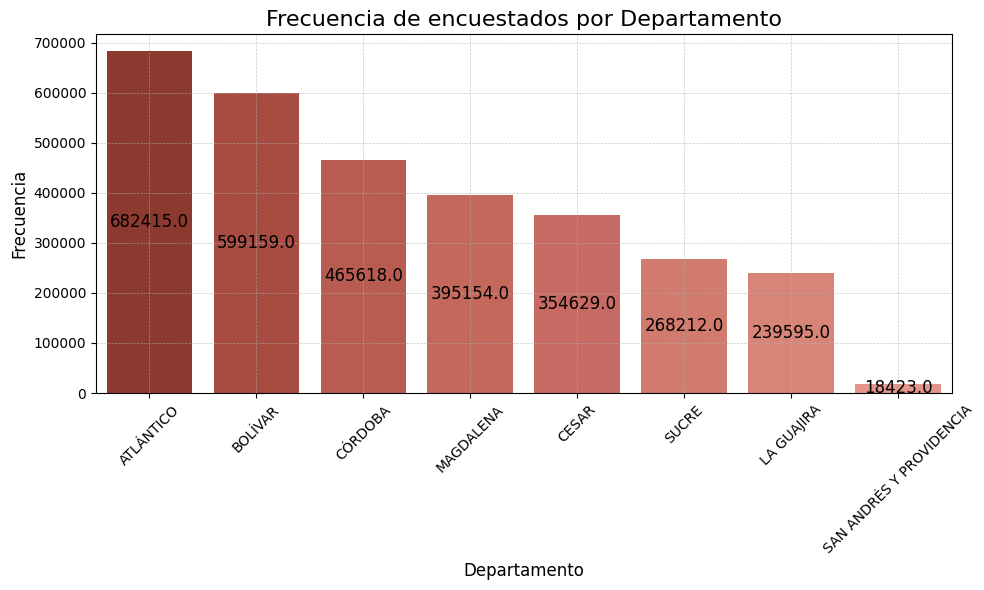

In [721]:
custom_reds_vinotinto = ['#9B2D20', '#B93D30', '#C94F40', '#D65A4A', '#D85C53', '#E26E5D', '#E77968', '#F28A7A']

casos_por_departamento = casos_por_departamento.loc[casos_por_departamento['FRECUENCIA'].sort_values(ascending=False).index]
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=casos_por_departamento, x='DEPARTAMENTO', y='FRECUENCIA', palette=custom_reds_vinotinto)

# Mejorar la apariencia del gráfico
plt.title('Frecuencia de encuestados por Departamento', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para que se vean mejor
plt.tight_layout()  # Asegura que todo el gráfico se ajuste bien

# Agregar las cantidades en el centro de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 0), textcoords='offset points')

plt.grid(linewidth=0.5, linestyle='--', alpha=0.7)  
plt.show()

#### **Distribución de encuestados por manzana**

In [722]:
encuestados_por_manzanas = df_dane_2018.groupby(['COD_MANZANA', 'DEPARTAMENTO', 'MUNICIPIO']).size().reset_index(name='FRECUENCIA')
encuestados_por_manzanas


,COD_MANZANA,DEPARTAMENTO,MUNICIPIO,FRECUENCIA
0,0800110000000000000000,ATLÁNTICO,BARRANQUILLA,136
1,0800110000000000010101,ATLÁNTICO,BARRANQUILLA,21
2,0800110000000000010102,ATLÁNTICO,BARRANQUILLA,42
3,0800110000000000010103,ATLÁNTICO,BARRANQUILLA,36
4,0800110000000000010105,ATLÁNTICO,BARRANQUILLA,114
...,...,...,...,...
132929,8856430050100000000000,SAN ANDRÉS Y PROVIDENCIA,PROVIDENCIA,22
132930,8856430060100000000000,SAN ANDRÉS Y PROVIDENCIA,PROVIDENCIA,31
132931,8856430070100000000000,SAN ANDRÉS Y PROVIDENCIA,PROVIDENCIA,22
132932,8856430080000000000000,SAN ANDRÉS Y PROVIDENCIA,PROVIDENCIA,2


## **Encuesta de cultura política**

In [723]:
df_ecc_democracia = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecc\\democracia_ecc_2023.CSV")
df_ecc_viviendas = pd.read_csv("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_ecc\\viviendas_ecc_2023.CSV")

In [724]:
df_ecc_democracia.shape, df_ecc_viviendas.shape

((46392, 172), (22994, 15))

In [725]:
df_ecc_viviendas = df_ecc_viviendas.drop_duplicates(subset='DIRECTORIO', keep='first')
df_ecc_democracia = df_ecc_democracia.drop_duplicates(subset='DIRECTORIO', keep='first')

### **Filtración por columnas de interés**

In [726]:
columnas_viviendas = ['DIRECTORIO', 'REGION','FEX_P']
df_ecc_viviendas = df_ecc_viviendas[columnas_viviendas]

columnas_democracia = ['DIRECTORIO', 'P5319', 'P5301', 'P5304S1', 'P5304S2', 'P5304S3', 'P5304S4', 'P5304S5', 'P5304S6', 
                       'P5304S9', 'P5304S10', 'P5306S1', 'P5306S2', 'P5306S3', 'P5306S4', 'P5306S5', 'P5306S6', 'P5306S7', 
                       'P6936S6', 'P5263S2', 'P5263S3']
df_ecc_democracia = df_ecc_democracia[columnas_democracia]

In [727]:
df_ecc = df_ecc_democracia.merge(df_ecc_viviendas, on='DIRECTORIO', how='left')
df_ecc.head()

,DIRECTORIO,P5319,P5301,P5304S1,P5304S2,P5304S3,P5304S4,P5304S5,P5304S6,P5304S9,...,P5306S3,P5306S4,P5306S5,P5306S6,P5306S7,P6936S6,P5263S2,P5263S3,REGION,FEX_P
0,112214,3,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,1,2,2,607.014979
1,112215,2,2,1,1,2,1,2,2,2,...,1,1,1,1,1,2,3,3,2,596.466248
2,112216,3,2,2,2,2,2,2,2,2,...,2,1,2,2,2,2,2,2,2,579.236307
3,112217,2,1,1,1,1,1,1,1,1,...,1,1,2,2,1,2,4,4,2,669.738808
4,112218,3,2,2,2,2,1,2,2,2,...,2,1,2,2,2,1,4,4,2,333.318880


### **Organización del conjunto de datos**

#### **Renombrado de variables**

In [728]:
df_ecc.columns

Index(['DIRECTORIO', 'P5319', 'P5301', 'P5304S1', 'P5304S2', 'P5304S3',
       'P5304S4', 'P5304S5', 'P5304S6', 'P5304S9', 'P5304S10', 'P5306S1',
       'P5306S2', 'P5306S3', 'P5306S4', 'P5306S5', 'P5306S6', 'P5306S7',
       'P6936S6', 'P5263S2', 'P5263S3', 'REGION', 'FEX_P'],
      dtype='object')

In [729]:
columnas_ecc = {
    'DIRECTORIO': 'ID',
    'P5319': 'PERCEPCION_DEMOCRACIA',
    'P5301': 'SATISFACCION_DEMOCRACIA',
    'P5304S1': 'RESPETO_ELEGIR_SER_ELEGIDO',
    'P5304S2': 'GARANTIA_PARTICIPAR',
    'P5304S3': 'LIBERTAD_EXPRESION',
    'P5304S4': 'LIBERTAD_PERTENENCIA_POLITICA',
    'P5304S5': 'GARANTIA_MANIFESTACION',
    'P5304S6': 'GARANTIA_IGUALDAD_LEY',
    'P5304S9': 'ACCESO_INFO_PUBLICA',
    'P5304S10': 'CONTROL_SOCIAL_ESTADO',
    'P5306S1': 'PROTECCION_VIDA_LIBERTAD',
    'P5306S2': 'PROTECCION_DERECHOS_SOCIALES',
    'P5306S3': 'PROTECCION_LIBERTAD_EXPRESION',
    'P5306S4': 'PROTECCION_RECREACION_CULTURA',
    'P5306S5': 'PROTECCION_DERECHOS_MINORIAS',
    'P5306S6': 'PROTECCION_DERECHOS_CAMPESINOS',
    'P5306S7': 'PROTECCION_DERECHOS_MUJERES',
    'P6936S6': 'RIESGOS_DERECHOS_COMUNIDAD',
    'P5263S2': 'CONFIANZA_ALCALDIA',
    'P5263S3': 'CONFIANZA_FUERZAS_MILITARES'
}
df_ecc = df_ecc.rename(columns = columnas_ecc)

In [730]:
columnas_ordenadas = [
    'ID', 'REGION', 'FEX_P', 'PERCEPCION_DEMOCRACIA', 'SATISFACCION_DEMOCRACIA',
    'RESPETO_ELEGIR_SER_ELEGIDO', 'GARANTIA_PARTICIPAR', 'LIBERTAD_EXPRESION',
    'LIBERTAD_PERTENENCIA_POLITICA', 'GARANTIA_MANIFESTACION', 'GARANTIA_IGUALDAD_LEY',
    'ACCESO_INFO_PUBLICA', 'CONTROL_SOCIAL_ESTADO', 'PROTECCION_VIDA_LIBERTAD',
    'PROTECCION_DERECHOS_SOCIALES', 'PROTECCION_LIBERTAD_EXPRESION',
    'PROTECCION_RECREACION_CULTURA', 'PROTECCION_DERECHOS_MINORIAS',
    'PROTECCION_DERECHOS_CAMPESINOS', 'PROTECCION_DERECHOS_MUJERES',
    'RIESGOS_DERECHOS_COMUNIDAD', 'CONFIANZA_ALCALDIA', 'CONFIANZA_FUERZAS_MILITARES'
]

df_ecc = df_ecc[columnas_ordenadas]

#### **Renombrado de categorías**

In [731]:
categorias_democracia = {
    1: 'Democrático',
    2: 'Medianamente democrático',
    3: 'No democrático'
}

categorias_democracia2 = {
    1: 'Muy insatisfecho(a)',
    2: 'Insatisfecho(a)',
    3: 'Ni satisfecho(a) ni insatisfecho(a)',
    4: 'Satisfecho(a)',
    5: 'Muy satisfecho(a)',
    99: 'No sabe/no informa'
}

categorias_confianza = {
    1: 'No confía',
    2: 'Confía poco',
    3: 'Ni mucho ni poco',
    4: 'Confía',
    5: 'Confía mucho',
    99: 'No sabe/No informa'
}
categorias_map = {1: 'SI', 2: 'NO', 99: 'No sabe/No informa'}

categorias_region = {
    1: 'Bogotá',
    2: 'Caribe',
    3: 'Oriental',
    4: 'Central',
    5: 'Pacífica'
}

In [732]:
df_ecc['REGION'] = df_ecc['REGION'].map(categorias_region)
df_ecc['PERCEPCION_DEMOCRACIA'] = df_ecc['PERCEPCION_DEMOCRACIA'].map(categorias_democracia)
df_ecc['SATISFACCION_DEMOCRACIA'] = df_ecc['SATISFACCION_DEMOCRACIA'].map(categorias_democracia2)
df_ecc['RESPETO_ELEGIR_SER_ELEGIDO'] = df_ecc['RESPETO_ELEGIR_SER_ELEGIDO'].map(categorias_map)
df_ecc['GARANTIA_PARTICIPAR'] = df_ecc['GARANTIA_PARTICIPAR'].map(categorias_map)
df_ecc['LIBERTAD_EXPRESION'] = df_ecc['LIBERTAD_EXPRESION'].map(categorias_map)
df_ecc['LIBERTAD_PERTENENCIA_POLITICA'] = df_ecc['LIBERTAD_PERTENENCIA_POLITICA'].map(categorias_map)
df_ecc['GARANTIA_MANIFESTACION'] = df_ecc['GARANTIA_MANIFESTACION'].map(categorias_map)
df_ecc['GARANTIA_IGUALDAD_LEY'] = df_ecc['GARANTIA_IGUALDAD_LEY'].map(categorias_map)
df_ecc['ACCESO_INFO_PUBLICA'] = df_ecc['ACCESO_INFO_PUBLICA'].map(categorias_map)
df_ecc['CONTROL_SOCIAL_ESTADO'] = df_ecc['CONTROL_SOCIAL_ESTADO'].map(categorias_map)
df_ecc['RIESGOS_DERECHOS_COMUNIDAD'] = df_ecc['RIESGOS_DERECHOS_COMUNIDAD'].map(categorias_map)
df_ecc['PROTECCION_VIDA_LIBERTAD'] = df_ecc['PROTECCION_VIDA_LIBERTAD'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_SOCIALES'] = df_ecc['PROTECCION_DERECHOS_SOCIALES'].map(categorias_map)
df_ecc['PROTECCION_LIBERTAD_EXPRESION'] = df_ecc['PROTECCION_LIBERTAD_EXPRESION'].map(categorias_map)
df_ecc['PROTECCION_RECREACION_CULTURA'] = df_ecc['PROTECCION_RECREACION_CULTURA'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_MINORIAS'] = df_ecc['PROTECCION_DERECHOS_MINORIAS'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_CAMPESINOS'] = df_ecc['PROTECCION_DERECHOS_CAMPESINOS'].map(categorias_map)
df_ecc['PROTECCION_DERECHOS_MUJERES'] = df_ecc['PROTECCION_DERECHOS_MUJERES'].map(categorias_map)
df_ecc['CONFIANZA_ALCALDIA'] = df_ecc['CONFIANZA_ALCALDIA'].map(categorias_confianza)
df_ecc['CONFIANZA_FUERZAS_MILITARES'] = df_ecc['CONFIANZA_FUERZAS_MILITARES'].map(categorias_confianza)


#### **Diccionario de variables**



| Variable             | Descripción                                                                                          | Categorías |
|------------------------------------|------------------------------------------------------------------------------------------------------|------------|
| `ID`                               | Identificación única de la encuesta realizada.                                                       | `Numérico` |
| `REGION`                               | Región donde está ubicado la persona encuestada.   <br> **En este caso solo se tendrá en cuenta la región Caribe**                                                   | `Bogotá`, `Caribe`, `Oriental`,`Central`,`Pacífica` |
| `FEX_P`                               | Factor de expansión muestral.                                                       | `Numérico` |
| `PERCEPCION_DEMOCRACIA`            | Percepción general sobre la democracia en Colombia.                                                  | `Democrático`<br>`Medianamente democrático`<br>`No democrático` |
| `SATISFACCION_DEMOCRACIA`          | Grado de satisfacción con el funcionamiento de la democracia en Colombia.                            | `Muy insatisfecho(a)`<br>`Insatisfecho(a)`<br>`Ni satisfecho(a) ni insatisfecho(a)`<br>`Satisfecho(a)`<br>`Muy satisfecho(a)`<br>`No sabe/no informa` |
| `RESPETO_ELEGIR_SER_ELEGIDO`       | Considera que en Colombia se respeta el derecho a elegir y ser elegido.                               | `SI`<br>`NO`<br>`No sabe/No informa` |
| `GARANTIA_PARTICIPACION`           | Considera que en Colombia se garantiza el derecho a participar.                                       | `SI`<br>`NO`<br>`No sabe/No informa` |
| `LIBERTAD_EXPRESION`               | Considera que en Colombia existe libertad para expresar y difundir el pensamiento.                   | `SI`<br>`NO`<br>`No sabe/No informa` |
| `LIBERTAD_PERTENENCIA_POLITICA`    | Considera que en Colombia existe libertad para pertenecer a partidos y movimientos políticos.         | `SI`<br>`NO`<br>`No sabe/No informa` |
| `GARANTIA_MANIFESTACION`           | Considera que en Colombia existen garantías para manifestarse públicamente.                          | `SI`<br>`NO`<br>`No sabe/No informa` |
| `IGUALDAD_ANTE_LA_LEY`            | Considera que en Colombia se garantiza el derecho a la igualdad ante la ley.                          | `SI`<br>`NO`<br>`No sabe/No informa` |
| `ACCESO_INFO_PUBLICA`              | Considera que en Colombia se facilita el acceso de los ciudadanos a la información pública.           | `SI`<br>`NO`<br>`No sabe/No informa` |
| `CONTROL_SOCIAL_GESTION`           | Considera que en Colombia se permite a los ciudadanos ejercer control social sobre la gestión del Estado. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_VIDA_LIBERTAD`         | Considera que en Colombia se protegen los derechos a la vida, libertad, integridad y seguridad.        | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_SOCIALES`     | Considera que en Colombia se protegen los derechos a educación, salud, seguridad social, trabajo y vivienda. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_LIBERTAD_INFORMACION`  | Considera que en Colombia se protegen los derechos a la libertad de expresión, conciencia y divulgación de información. | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_RECREACION_CULTURA`    | Considera que en Colombia se protegen los derechos a la recreación y la cultura.                      | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_MINORIAS`     | Considera que en Colombia se protegen los derechos de las minorías étnicas y sociales.                | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_CAMPESINOS`   | Considera que en Colombia se protegen los derechos del campesinado.                                   | `SI`<br>`NO`<br>`No sabe/No informa` |
| `PROTECCION_DERECHOS_MUJERES`      | Considera que en Colombia se protegen los derechos de las mujeres.                                    | `SI`<br>`NO`<br>`No sabe/No informa` |
| `RIESGOS_COMUNIDAD`                | Percepción sobre si en el último año surgieron riesgos en la comunidad del encuestado contra la vida, libertad e integridad (por ejemplo, estigmatización o discriminación). | `SI`<br>`NO`<br>`No sabe/No informa` |
| `CONFIANZA_ALCALDIA`               | Nivel de confianza del encuestado en la Alcaldía Municipal o Distrital.                               | `No confía`<br>`Confía poco`<br>`Ni mucho ni poco`<br>`Confía`<br>`Confía mucho`<br>`No sabe/No informa` |
| `CONFIANZA_FUERZAS_MILITARES`      | Nivel de confianza del encuestado en las Fuerzas Militares (Ejército, Armada y Fuerza Aérea).        | `No confía`<br>`Confía poco`<br>`Ni mucho ni poco`<br>`Confía`<br>`Confía mucho`<br>`No sabe/No informa` |


### **Datos faltantes**

In [733]:
analizar_columnas_faltantes(df_ecc)

No hay datos faltantes.


### **Filtración del conjunto de datos: Región Caribe**

In [734]:
df_ecc.shape

(22990, 23)

In [735]:
df_ecc_caribe = df_ecc[df_ecc['REGION'] == 'Caribe']
df_ecc_caribe.shape

(4628, 23)

## **PIB: Producto interno bruto**

El Producto Interno Bruto (PIB) en Colombia es una medida clave de la actividad económica de cada uno de los departamentos del país. Al analizar el PIB de un departamento, se puede obtener una visión general de su capacidad productiva y de su nivel de desarrollo económico. Un PIB bajo o en crecimiento lento puede reflejar un nivel de pobreza más alto, ya que indica una menor generación de riqueza en comparación con otros departamentos. Además, una correlación entre el PIB per cápita y las tasas de pobreza permite identificar áreas con más necesidades, donde los recursos limitados pueden no ser suficientes para satisfacer las demandas básicas de la población. De esta forma, el PIB se convierte en una herramienta útil para evaluar las disparidades económicas y focalizar esfuerzos de políticas públicas que busquen mitigar la pobreza.

In [736]:
df_pib = pd.read_excel("C:\\Users\\CCOSTA397\\Desktop\\CIDEACC\\datos-externos-convocatoria38\\data_pib.xlsx")

In [737]:
df_pib['COD_DEPTO'] = df_pib['COD_DEPTO'].astype(str).str.zfill(2)
df_pib['DEPARTAMENTO'] = df_pib['DEPARTAMENTO'].str.upper()
df_pib.head()

,COD_DEPTO,DEPARTAMENTO,PIB,PARTICIPACION_PORCENTUAL,AÑO
0,00,COLOMBIA,"1,584,562",100.0,2023
1,91,AMAZONAS,1.213,0.1,2023
2,05,ANTIOQUIA,231.122,14.6,2023
3,81,ARAUCA,8.743,0.6,2023
4,08,ATLÁNTICO,70.862,4.5,2023


In [738]:
df_pib.head(1)

,COD_DEPTO,DEPARTAMENTO,PIB,PARTICIPACION_PORCENTUAL,AÑO
0,00,COLOMBIA,"1,584,562",100.0,2023


### **Filtración por departamentos de región Caribe**

In [739]:
df_pib['DEPARTAMENTO'] = df_pib['DEPARTAMENTO'].replace({
     'SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA (ARCHIPIÉLAGO)' : 'SAN ANDRÉS Y PROVIDENCIA'})

In [740]:
caribe_codigos = ['08', '13', '20', '23', '44', '47', '70', '88']
df_pib_caribe = df_pib[df_pib['COD_DEPTO'].isin(caribe_codigos)]
df_pib_caribe.head(10)

,COD_DEPTO,DEPARTAMENTO,PIB,PARTICIPACION_PORCENTUAL,AÑO
4,08,ATLÁNTICO,70.862,4.5,2023
6,13,BOLÍVAR,56.924,3.6,2023
12,20,CESAR,34.821,2.2,2023
14,23,CÓRDOBA,28.303,1.8,2023
19,44,LA GUAJIRA,20.346,1.3,2023
20,47,MAGDALENA,21.914,1.4,2023
27,88,SAN ANDRÉS Y PROVIDENCIA,2.286,0.1,2023
29,70,SUCRE,12.705,0.8,2023


### **Diccionario de variables**

| Variable       | Descripción                                                                 | Categorías / Tipo                                                                 |
|----------------|------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| `COD_DEPTO` | Código del departamento.                                                     | `Texto`                                                                            |
| `DEPARTAMENTO`    | Nombre del departamento.<br> **En este caso solo se tendrán en cuenta los departamentos de la región Caribe**                                                  | `Texto`                                                                            |
| `PIB`     | Producto interno bruto departamental a precios corrientes y en miles de millones de pesos.                        | `Numérico`                                                                         |
| `PARTICIPACION_PORCENTUAL`      | Participación porcentual de cada departamento en el PIB global de Colombia                          | `Numérico`                                                                         |
| `AÑO`| Año en el que fue evaluada la medida PIB  |   `2023`|

### **Datos faltantes**

In [741]:
analizar_columnas_faltantes(df_pib)

No hay datos faltantes.
